###### Note to users: To create the running chart like mine, please organize your excel file in the same format as below.
I will use pandas to import and make modifications to the data I import from the excel file.

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('FPL2021.xlsx')
df[:5] 
# I am displaying only the 1st five gameweeks here. 
# You can display lesser or more by changing the gameweeks number.

,GWS,Mahesh,Rajen,Dinesh,Saroj,Abinash,Prakash,Ashok,Bikash,Rajib,Deep,Shiv,Matrika,Ayush,Bibek,Youth,Anil
0,GW1,66,82,68,69,75,76,70,65,47,50,64,82,73,80,58,48
1,GW2,131,127,134,99,131,133,149,153,123,88,119,112,140,165,120,135
2,GW3,191,172,176,147,171,185,186,186,162,124,148,165,185,195,150,166
3,GW4,238,201,220,190,239,252,252,245,205,192,183,209,233,242,189,207
4,GW5,302,255,289,229,309,312,317,271,269,242,246,279,314,288,237,271


Because I want to make the running chart continuous and longer, I will interpolate values between each gameweek scores. If you have a large data set then you don't need to interpolate.

We have 38 gameweek scores. Lets say we want to interpolate and have 10 scores between each gameweeks. Lets call the total number of scores we want between each gameweeks by 'steps'. Then we will write a code that simply uses the original pandas dataframe and the steps as variable and creates a new pandas dataframe of the interpolated scores. I have written the code and explained the steps in the code itself.

In [3]:
# df.index gives the values of the indices of each rows.
# Since we want 10 values for each gameweek, then if indexing starts at 0,
# index for second gameweek should be at 10, third gameweek for 20 and so on.
# We achieve this by multiplying each indices of rows by 'steps'.  
steps = 10
df.index = df.index * steps
df[:steps+1]

,GWS,Mahesh,Rajen,Dinesh,Saroj,Abinash,Prakash,Ashok,Bikash,Rajib,Deep,Shiv,Matrika,Ayush,Bibek,Youth,Anil
0,GW1,66,82,68,69,75,76,70,65,47,50,64,82,73,80,58,48
10,GW2,131,127,134,99,131,133,149,153,123,88,119,112,140,165,120,135
20,GW3,191,172,176,147,171,185,186,186,162,124,148,165,185,195,150,166
30,GW4,238,201,220,190,239,252,252,245,205,192,183,209,233,242,189,207
40,GW5,302,255,289,229,309,312,317,271,269,242,246,279,314,288,237,271
50,GW6,340,305,346,267,349,366,371,312,322,283,294,332,387,323,301,313
60,GW7,384,350,408,326,420,419,416,372,390,338,333,374,437,384,339,355
70,GW8,459,408,499,376,489,487,472,432,472,413,397,421,493,430,393,423
80,GW9,532,468,576,398,544,558,536,498,540,487,470,470,585,502,427,482
90,GW10,578,514,623,444,576,601,580,530,593,531,521,516,646,553,459,523


In [4]:
# Retreive the value of the last index as last_index of the to-be interpolated table.
last_index = df.index[-1] + 1
last_index

371

In [5]:
# I reindexed the interpolated table between 0 and the last_idx.
# This will also fill the new rows with NaN values in the interpolated table.
# I have shown the interpolated table below.
df_interpolated = df.reindex(range(last_index))
df_interpolated[:steps+1]

,GWS,Mahesh,Rajen,Dinesh,Saroj,Abinash,Prakash,Ashok,Bikash,Rajib,Deep,Shiv,Matrika,Ayush,Bibek,Youth,Anil
0,GW1,66.0,82.0,68.0,69.0,75.0,76.0,70.0,65.0,47.0,50.0,64.0,82.0,73.0,80.0,58.0,48.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# The above step will create 'steps-1' other rows for each gameweeks filled with NaN.
# First we will rewrite the interpolated rows of the column 'GWS'by the appropriate gameweek name.
# This is achieved easily by 'ffill' method in pandas.
df_interpolated['GWS'] = df_interpolated['GWS'].fillna(method='ffill')
df_interpolated[:steps+1]

,GWS,Mahesh,Rajen,Dinesh,Saroj,Abinash,Prakash,Ashok,Bikash,Rajib,Deep,Shiv,Matrika,Ayush,Bibek,Youth,Anil
0,GW1,66.0,82.0,68.0,69.0,75.0,76.0,70.0,65.0,47.0,50.0,64.0,82.0,73.0,80.0,58.0,48.0
1,GW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,GW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## Then we simply use pandas interpolation routine 'interpolate'.
df_interpolated = df_interpolated.interpolate()
df_interpolated[:steps+1]

,GWS,Mahesh,Rajen,Dinesh,Saroj,Abinash,Prakash,Ashok,Bikash,Rajib,Deep,Shiv,Matrika,Ayush,Bibek,Youth,Anil
0,GW1,66.0,82.0,68.0,69.0,75.0,76.0,70.0,65.0,47.0,50.0,64.0,82.0,73.0,80.0,58.0,48.0
1,GW1,72.5,86.5,74.6,72.0,80.6,81.7,77.9,73.8,54.6,53.8,69.5,85.0,79.7,88.5,64.2,56.7
2,GW1,79.0,91.0,81.2,75.0,86.2,87.4,85.8,82.6,62.2,57.6,75.0,88.0,86.4,97.0,70.4,65.4
3,GW1,85.5,95.5,87.8,78.0,91.8,93.1,93.7,91.4,69.8,61.4,80.5,91.0,93.1,105.5,76.6,74.1
4,GW1,92.0,100.0,94.4,81.0,97.4,98.8,101.6,100.2,77.4,65.2,86.0,94.0,99.8,114.0,82.8,82.8
5,GW1,98.5,104.5,101.0,84.0,103.0,104.5,109.5,109.0,85.0,69.0,91.5,97.0,106.5,122.5,89.0,91.5
6,GW1,105.0,109.0,107.6,87.0,108.6,110.2,117.4,117.8,92.6,72.8,97.0,100.0,113.2,131.0,95.2,100.2
7,GW1,111.5,113.5,114.2,90.0,114.2,115.9,125.3,126.6,100.2,76.6,102.5,103.0,119.9,139.5,101.4,108.9
8,GW1,118.0,118.0,120.8,93.0,119.8,121.6,133.2,135.4,107.8,80.4,108.0,106.0,126.6,148.0,107.6,117.6
9,GW1,124.5,122.5,127.4,96.0,125.4,127.3,141.1,144.2,115.4,84.2,113.5,109.0,133.3,156.5,113.8,126.3


In [8]:
# Here I have accumulated all the steps we followed upto now to create an interpolated table.
# You can simply use the function defined below
# which takes your original pandas table and interpolation steps as variable
# and outputs the interpolated table. Try for yourself!
def continuous_data(df, steps): 
    df.index = df.index * steps
    last_index = df.index[-1] + 1
    df_interpolated = df.reindex(range(last_index))
    df_interpolated['GWS'] = df_interpolated['GWS'].fillna(method='ffill')
    df_interpolated = df_interpolated.interpolate()
    return df_interpolated
df = pd.read_excel('FPL2021.xlsx')
steps = 10
data = continuous_data(df=df, steps=steps)
data[:steps+1]

,GWS,Mahesh,Rajen,Dinesh,Saroj,Abinash,Prakash,Ashok,Bikash,Rajib,Deep,Shiv,Matrika,Ayush,Bibek,Youth,Anil
0,GW1,66.0,82.0,68.0,69.0,75.0,76.0,70.0,65.0,47.0,50.0,64.0,82.0,73.0,80.0,58.0,48.0
1,GW1,72.5,86.5,74.6,72.0,80.6,81.7,77.9,73.8,54.6,53.8,69.5,85.0,79.7,88.5,64.2,56.7
2,GW1,79.0,91.0,81.2,75.0,86.2,87.4,85.8,82.6,62.2,57.6,75.0,88.0,86.4,97.0,70.4,65.4
3,GW1,85.5,95.5,87.8,78.0,91.8,93.1,93.7,91.4,69.8,61.4,80.5,91.0,93.1,105.5,76.6,74.1
4,GW1,92.0,100.0,94.4,81.0,97.4,98.8,101.6,100.2,77.4,65.2,86.0,94.0,99.8,114.0,82.8,82.8
5,GW1,98.5,104.5,101.0,84.0,103.0,104.5,109.5,109.0,85.0,69.0,91.5,97.0,106.5,122.5,89.0,91.5
6,GW1,105.0,109.0,107.6,87.0,108.6,110.2,117.4,117.8,92.6,72.8,97.0,100.0,113.2,131.0,95.2,100.2
7,GW1,111.5,113.5,114.2,90.0,114.2,115.9,125.3,126.6,100.2,76.6,102.5,103.0,119.9,139.5,101.4,108.9
8,GW1,118.0,118.0,120.8,93.0,119.8,121.6,133.2,135.4,107.8,80.4,108.0,106.0,126.6,148.0,107.6,117.6
9,GW1,124.5,122.5,127.4,96.0,125.4,127.3,141.1,144.2,115.4,84.2,113.5,109.0,133.3,156.5,113.8,126.3


In [65]:
# Since we want each players bar to move up and down continuously in a flow 
# we will also create a rank dataframe which has interpolated values of ranks 
# between the consecutive ranks of players in each gameweeks.
# This we achieve very simply by using pandas 'rank' routine.
# We will overwrite the previous function and make it to output two results at the same time.
# Pretty convenient!
def continuous_data(df, steps): 
    df.index = df.index * steps
    last_index = df.index[-1] + 1
    df_interpolated = df.reindex(range(last_index))
    df_interpolated['GWS'] = df_interpolated['GWS'].fillna(method='ffill')
    df_rank = df_interpolated.rank(axis=1, method='first')
    df_interpolated = df_interpolated.interpolate()
    df_rank_interpolated = df_rank.interpolate()
    return df_interpolated, df_rank_interpolated
df = pd.read_excel('FPL2021.xlsx')
steps = 10
data, rank = continuous_data(df=df, steps=steps)
data[:steps+1]

,GWS,Mahesh,Rajen,Dinesh,Saroj,Abinash,Prakash,Ashok,Bikash,Rajib,Deep,Shiv,Matrika,Ayush,Bibek,Youth,Anil
0,GW1,66.0,82.0,68.0,69.0,75.0,76.0,70.0,65.0,47.0,50.0,64.0,82.0,73.0,80.0,58.0,48.0
1,GW1,72.5,86.5,74.6,72.0,80.6,81.7,77.9,73.8,54.6,53.8,69.5,85.0,79.7,88.5,64.2,56.7
2,GW1,79.0,91.0,81.2,75.0,86.2,87.4,85.8,82.6,62.2,57.6,75.0,88.0,86.4,97.0,70.4,65.4
3,GW1,85.5,95.5,87.8,78.0,91.8,93.1,93.7,91.4,69.8,61.4,80.5,91.0,93.1,105.5,76.6,74.1
4,GW1,92.0,100.0,94.4,81.0,97.4,98.8,101.6,100.2,77.4,65.2,86.0,94.0,99.8,114.0,82.8,82.8
5,GW1,98.5,104.5,101.0,84.0,103.0,104.5,109.5,109.0,85.0,69.0,91.5,97.0,106.5,122.5,89.0,91.5
6,GW1,105.0,109.0,107.6,87.0,108.6,110.2,117.4,117.8,92.6,72.8,97.0,100.0,113.2,131.0,95.2,100.2
7,GW1,111.5,113.5,114.2,90.0,114.2,115.9,125.3,126.6,100.2,76.6,102.5,103.0,119.9,139.5,101.4,108.9
8,GW1,118.0,118.0,120.8,93.0,119.8,121.6,133.2,135.4,107.8,80.4,108.0,106.0,126.6,148.0,107.6,117.6
9,GW1,124.5,122.5,127.4,96.0,125.4,127.3,141.1,144.2,115.4,84.2,113.5,109.0,133.3,156.5,113.8,126.3


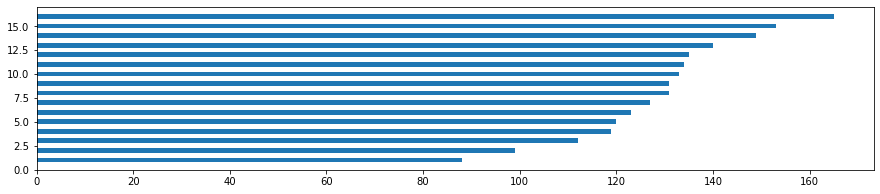

In [108]:
# A running chart is simply static frames of barcharts.
# So we are simply plotting barcharts for each rows of pandas table.
# call each row index 'i'.
# Then simply plot scores in x-axis and ranks in y-axis.
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(15, 3))
i = 10 # select 10th row.
scores = data.iloc[i][1:] # selects only the ith row scores.
ranks = rank.iloc[i] # selects only the ith row ranks.
# Often we want to show barcharts in descending order from top to bottom.
# So we sort the data into ascending order and plot the lowest rank in the bottom and move up.
sorted_scores = scores.sort_values() # sorts the scores in ascending order
sorted_ranks = ranks.sort_values() # sorts the ranks in ascending order
# In y-axis I want to plot the rank of each player in the ith gameweek which 
# is integers between 1 and the number of players. We designate these ranks as y.
y = (sorted_ranks.values).astype(float)
# Our x-axis is simply the sorted scores.
x = (sorted_scores.values).astype(float)
# Then we use 'barh' routine of python's plotting library to create horizontal barplot.
ax.barh(y, width = x, height = 0.5)
plt.show()

Then the next steps are only decorating these barplots. I want to assign colors to each player and I want to keep the colors fixed. So I will zip the player names and color names. I achieve this with the following block of code.

In [109]:
from matplotlib import colors as colors
# Import dictionary of colors
colors_dict = dict(colors.BASE_COLORS, **colors.CSS4_COLORS)
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(colors.rgb_to_hsv(colors.to_rgba(color)[:3])), name)
        for name, color in colors_dict.items())
# Sort the nature of color
sorted_names = [name for hsv, name in by_hsv]
# Select distinct colors. Pick the number of colors you want from the above list.
color_list = sorted_names[0:4 * len(mini_data):4]
# zip the color and the column names so that the same color is assigned everytime the plot updates.
colors_dict2 = dict(zip(df.columns[1:], color_list))

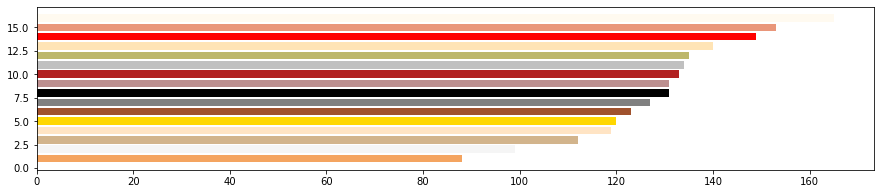

In [110]:
# Here I simply generate the same plot with unique colors assigned to the players.
# Change the value of i and check for youself if the same unique color
# is applied for the player in another gameweek.
fig, ax = plt.subplots(figsize=(15, 3))
i = 10
scores = data.iloc[i][1:]
ranks = rank.iloc[i]
sorted_scores = scores.sort_values()
sorted_ranks = ranks.sort_values()
y = (sorted_ranks.values).astype(float)
x = (sorted_scores.values).astype(float)
labels = sorted_ranks.index
ax.barh(y, width = x, height = 0.8, color=[colors_dict2[j] for j in labels])
plt.show()

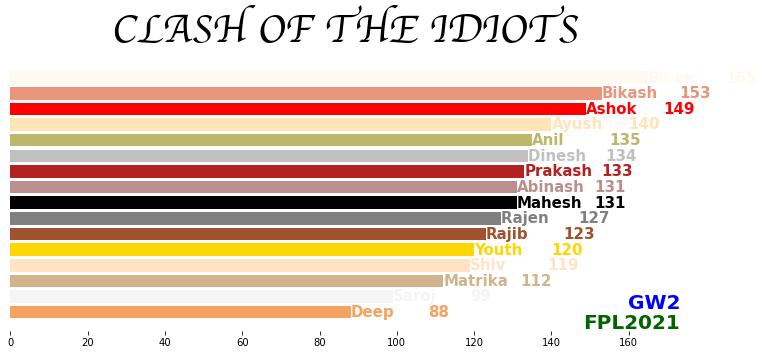

In [111]:
# Now we will decorate our plot with some other accessories.
fig, ax = plt.subplots(figsize=(12, 5))
i = 10
scores = data.iloc[i][1:]
ranks = rank.iloc[i]
sorted_scores = scores.sort_values()
sorted_ranks = ranks.sort_values()
y = (sorted_ranks.values).astype(float)
x = (sorted_scores.values).astype(float)
labels = sorted_ranks.index
ax.barh(y, width = x, height = 0.8, color=[colors_dict2[j] for j in labels])
for j in range(len(y)):
    # This will write players names at the end of the bar.
    ax.text(x[j],
            y[j],
            labels[j],
            color=colors_dict2[labels[j]],
            size=15,
            ha='left',
            va='center',
            weight=1000)
    # This will write players score each gameweeks at the end of the bar.
    ax.text(x[j]+20,
            y[j],
            int(x[j]),
            color=colors_dict2[labels[j]],
            size=15,
            ha='left',
            va='center',
            weight=1000)
ax.text(1.0,
        0.01,
        'FPL2021',
        transform=ax.transAxes,
        color='darkgreen',
        size=20,
        ha='right',
        weight=800)
# This will write which gameweek scores are we looking at.
ax.text(1.0,
        0.08,
        data.iloc[i][0],
        transform=ax.transAxes,
        color='blue',
        size=20,
        ha='right',
        weight=800)
# I don't like yticks and yticklabels in the y-axis. This will create cleaner plot.
ax.set_yticklabels([])
ax.set_yticks([])
# I imported font family to use it to write the title of the plot.
font = {'family': 'cursive',
        'color': 'black',
        'weight': 'bold',
        'size': 40,}
# This will write the title of the plot.
ax.set_title('CLASH OF THE IDIOTS', fontdict=font, loc='center')
plt.box(False)
plt.show()

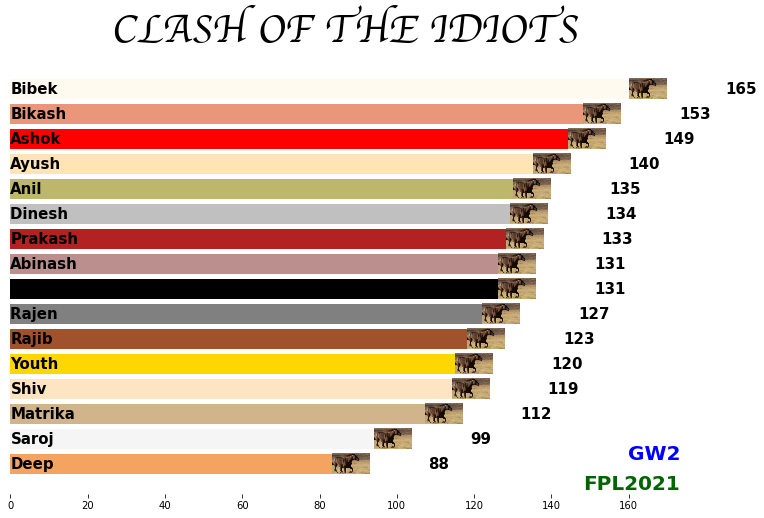

In [150]:
## I will create a fancier plot by inserting 10 frames of a horse running.
fig, ax = plt.subplots(figsize=(12, 8))
for bar in ax.containers:
    bar.remove()
ax.clear()
i=10
scores = data.iloc[i][1:]
ranks = rank.iloc[i]
sorted_scores = scores.sort_values()
sorted_ranks = ranks.sort_values()
y = (sorted_ranks.values).astype(float)
x = (sorted_scores.values).astype(float)
labels = sorted_ranks.index
ax.barh(y, width = x, height = 0.8, color=[colors_dict2[j] for j in labels])
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
image1 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_00_delay-0.06s.png')
image2 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_01_delay-0.06s.png')
image3 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_02_delay-0.06s.png')
image4 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_03_delay-0.06s.png')
image5 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_04_delay-0.06s.png')
image6 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_05_delay-0.06s.png')
image7 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_06_delay-0.06s.png')
image8 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_07_delay-0.06s.png')
image9 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_08_delay-0.06s.png')
image10 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/horse_running_images/frame_09_delay-0.06s.png')
images = [image1, image2, image3, image4, image5,
         image6, image7, image8, image9, image10]
images_for_animation = images*int(len(data)/len(images))
images_for_animation.append(image1)
arena = images_for_animation[i]
imagebox = OffsetImage(arena, zoom=0.15)
for j in range(len(y)):
    ax.text(0,
            y[j],
            labels[j],
            color='black',
            size=15,
            ha='left',
            va='center',
            weight=1000)
    ax.text(x[j]+20,
            y[j],
            int(x[j]),
            color='black',
            size=15,
            ha='left',
            va='center',
            weight=1000)
    ax.add_artist(AnnotationBbox(imagebox, (x[j], y[j]), frameon=False))
ax.text(1.0,
        0.01,
        'FPL2021',
        transform=ax.transAxes,
        color='darkgreen',
        size=20,
        ha='right',
        weight=800)
ax.text(1.0,
        0.08,
        data.iloc[i][0],
        transform=ax.transAxes,
        color='blue',
        size=20,
        ha='right',
        weight=800)
ax.set_yticklabels([])
ax.set_yticks([])
font = {'family': 'cursive',
        'color': 'black',
        'weight': 'bold',
        'size': 40,}
ax.set_title('CLASH OF THE IDIOTS', fontdict=font, loc='center')
plt.box(False)
plt.show()

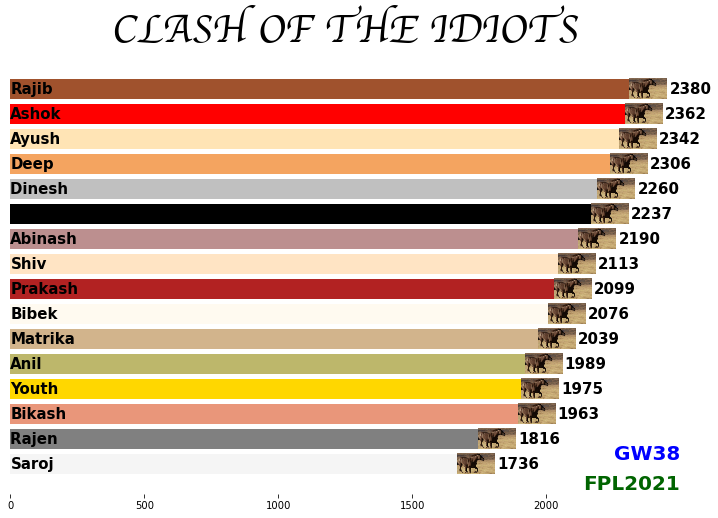

In [148]:
fig, ax = plt.subplots(figsize=(12, 8))
def barchart(i):
    for bar in ax.containers:
        bar.remove()
    ax.clear()
    scores = data.iloc[i][1:]
    ranks = rank.iloc[i]
    sorted_scores = scores.sort_values()
    sorted_ranks = ranks.sort_values()
    y = (sorted_ranks.values).astype(float)
    x = (sorted_scores.values).astype(float)
    labels = sorted_ranks.index
    ax.barh(y, width = x, height = 0.8, color=[colors_dict2[j] for j in labels])
    import matplotlib.image as image
    from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
    image1 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_00_delay-0.06s.png')
    image2 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_01_delay-0.06s.png')
    image3 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_02_delay-0.06s.png')
    image4 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_03_delay-0.06s.png')
    image5 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_04_delay-0.06s.png')
    image6 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_05_delay-0.06s.png')
    image7 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_06_delay-0.06s.png')
    image8 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_07_delay-0.06s.png')
    image9 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_08_delay-0.06s.png')
    image10 = image.imread('/Users/maheshworpaudel/Desktop/FPL/FPL20_21/ezgif-3-d9d2fc46a1-gif-png/frame_09_delay-0.06s.png')
    images = [image1, image2, image3, image4, image5,
             image6, image7, image8, image9, image10]
    images_for_animation = images*int(len(data)/len(images))
    images_for_animation.append(image1)
    arena = images_for_animation[i]
    imagebox = OffsetImage(arena, zoom=0.15)
    for j in range(len(y)):
        ax.text(0,
            y[j],
            labels[j],
            color='black',
            size=15,
            ha='left',
            va='center',
            weight=1000)
        ax.text(x[j]+80,
                y[j],
                int(x[j]),
                color='black',
                size=15,
                ha='left',
                va='center',
                weight=1000)
        ax.add_artist(AnnotationBbox(imagebox, (x[j], y[j]), frameon=False))
    ax.text(1.0,
            0.01,
            'FPL2021',
            transform=ax.transAxes,
            color='darkgreen',
            size=20,
            ha='right',
            weight=800)
    ax.text(1.0,
            0.08,
            data.iloc[i][0],
            transform=ax.transAxes,
            color='blue',
            size=20,
            ha='right',
            weight=800)
    ax.set_yticklabels([])
    ax.set_yticks([])
    font = {'family': 'cursive',
            'color': 'black',
            'weight': 'bold',
            'size': 40,}
    ax.set_title('CLASH OF THE IDIOTS', fontdict=font, loc='center')
    plt.box(False)
    plt.show()
    plt.close()
barchart(370)

The code below now will iterate over the length of the interpolated table we created. You might want to change frames per second and dpi ratios for better and length animations. DO NOT FORGET to add path for video making utility to the folder where ffmpeg app is installed. DO NOT FORGET to change the folder where you want to save your animation. 
Since I don't know how to embed sound in the background of an animation in python I did it using iMovie in mac. 

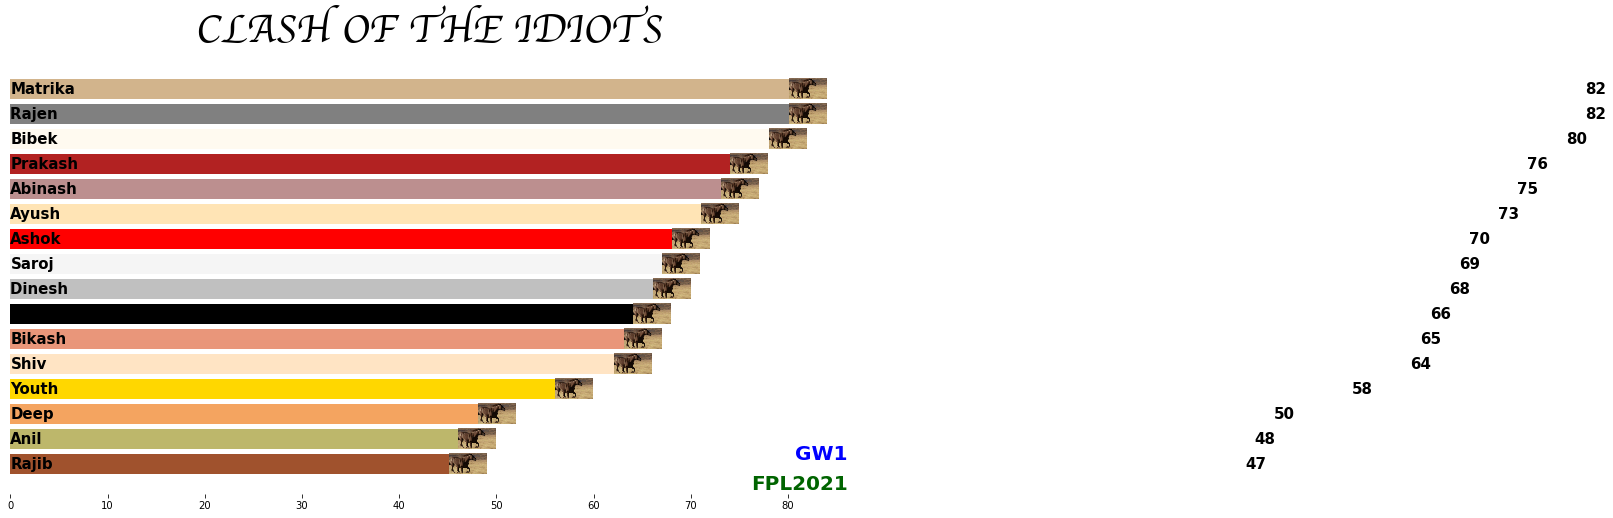

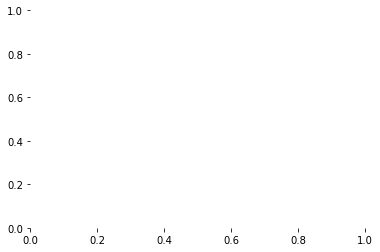

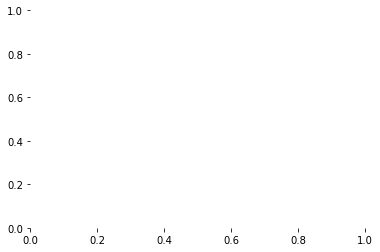

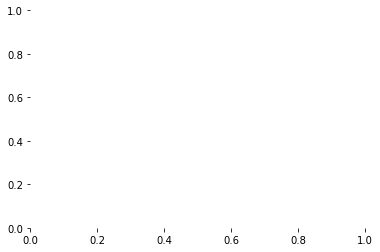

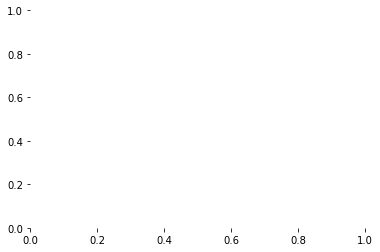

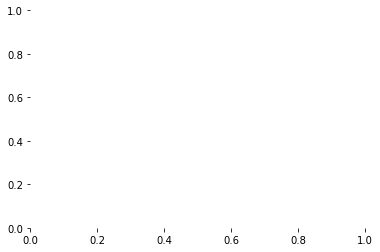

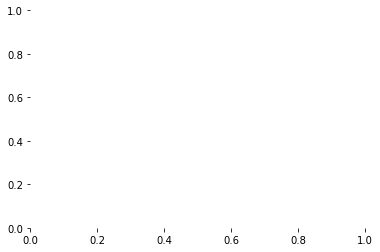

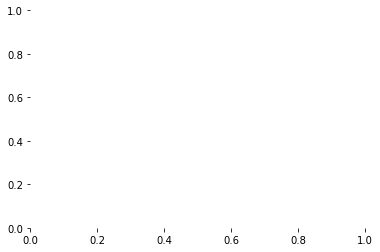

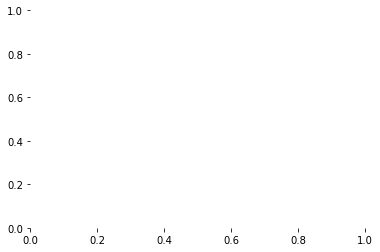

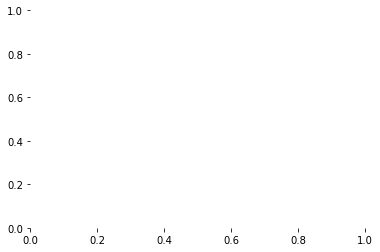

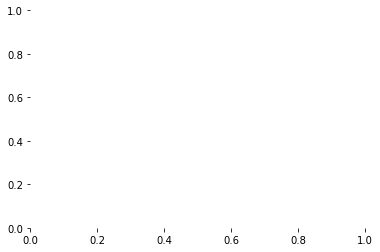

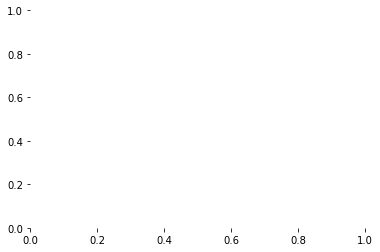

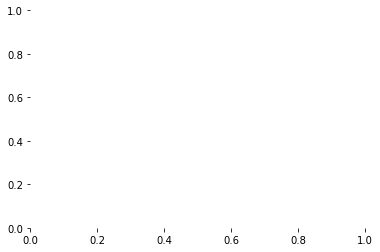

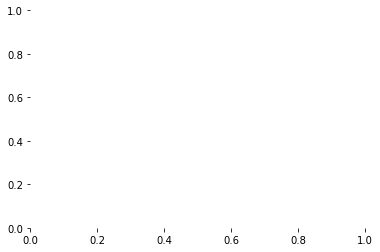

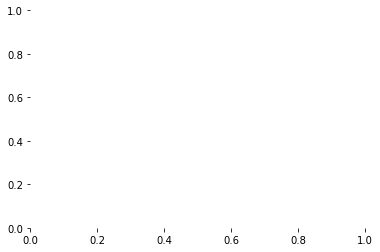

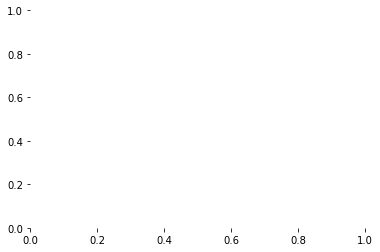

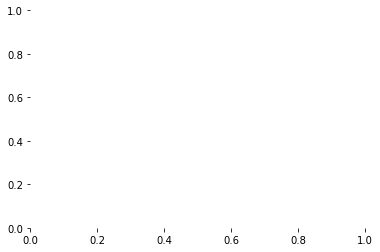

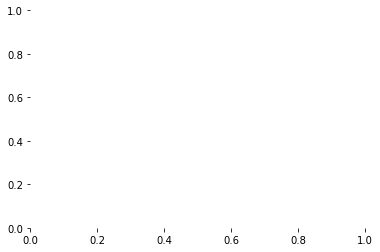

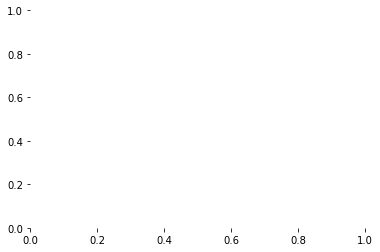

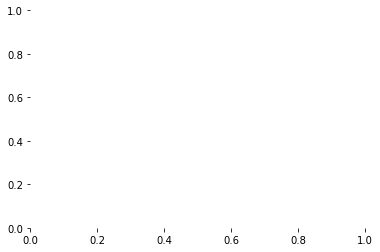

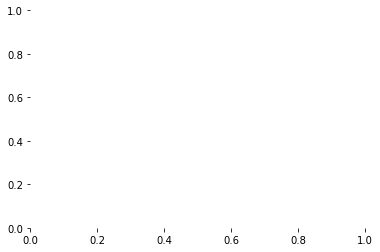

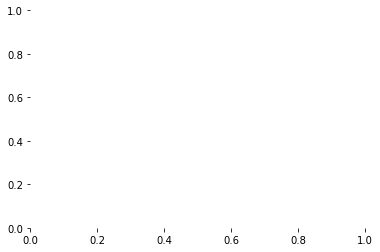

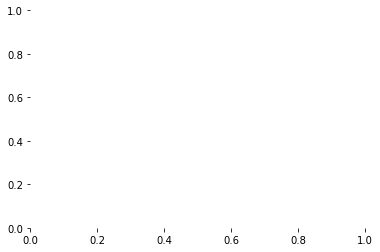

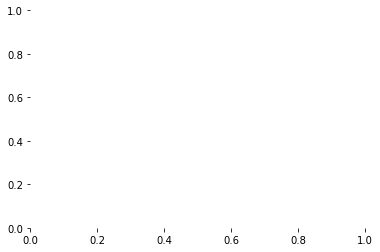

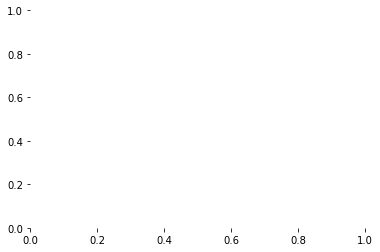

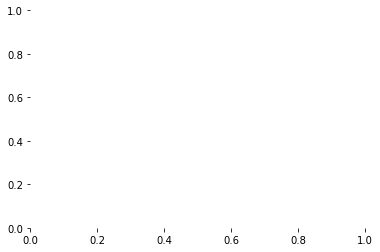

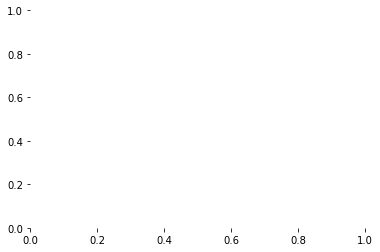

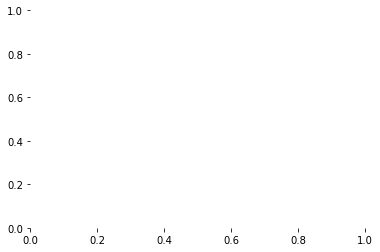

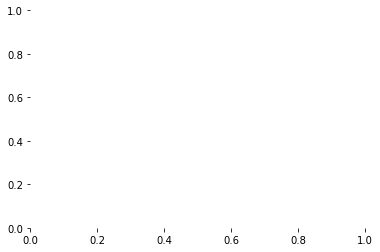

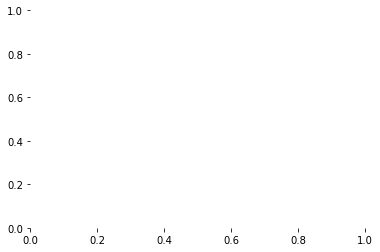

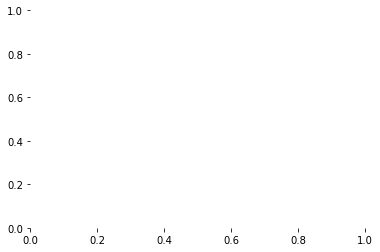

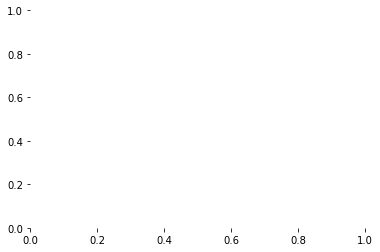

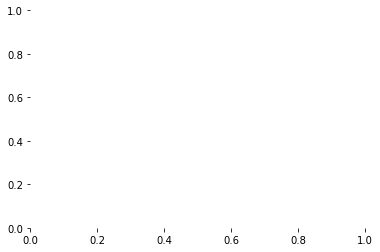

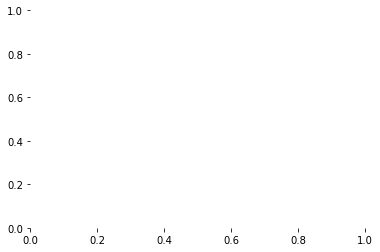

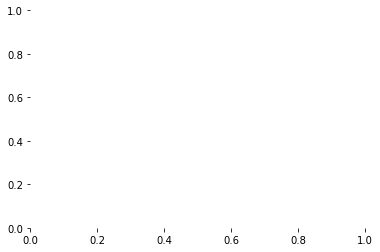

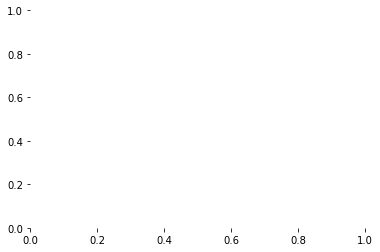

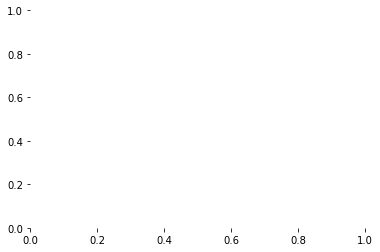

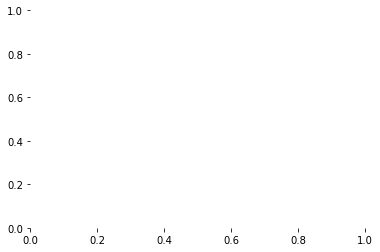

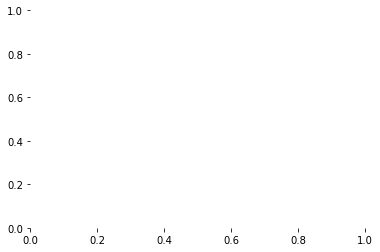

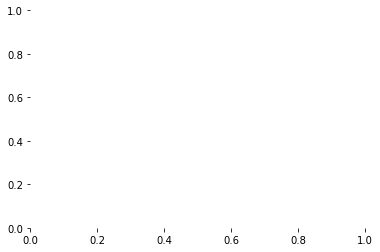

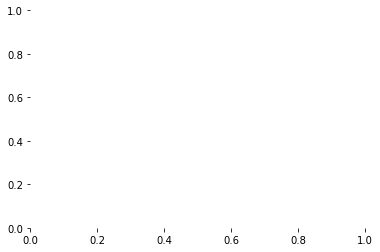

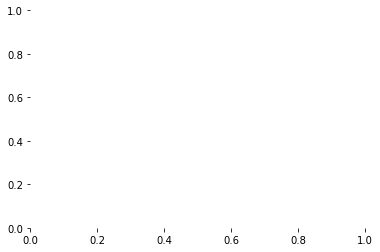

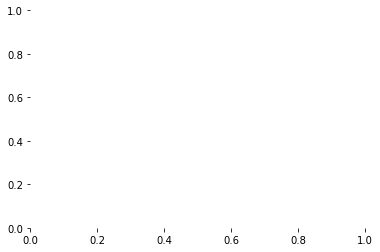

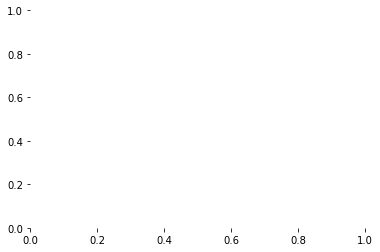

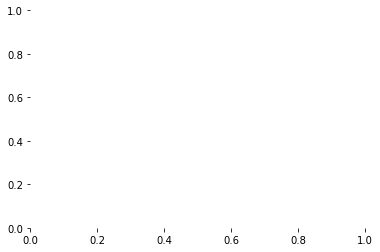

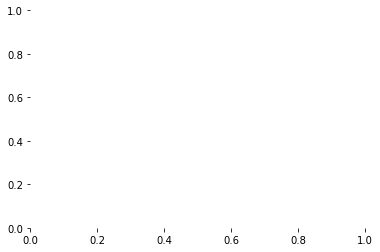

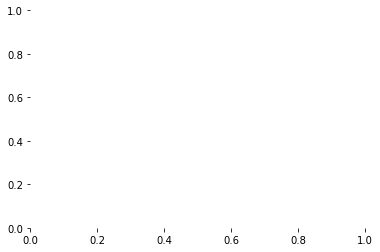

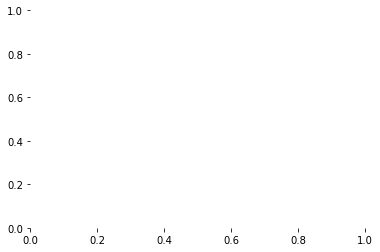

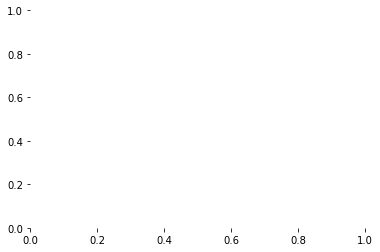

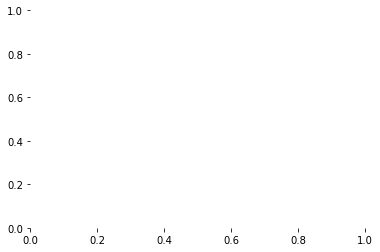

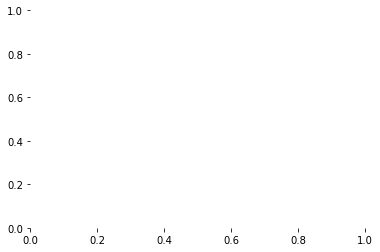

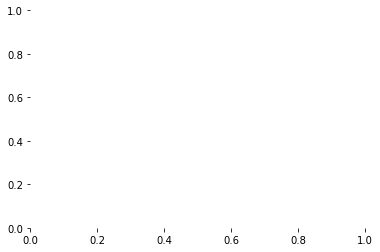

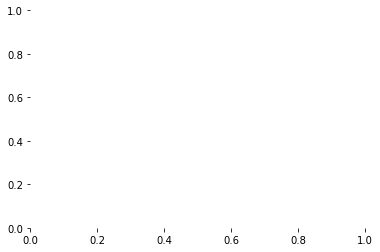

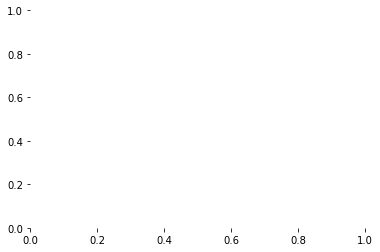

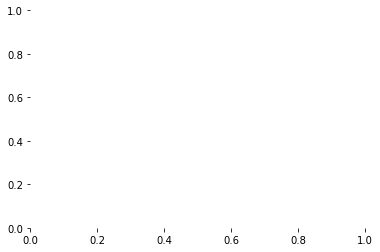

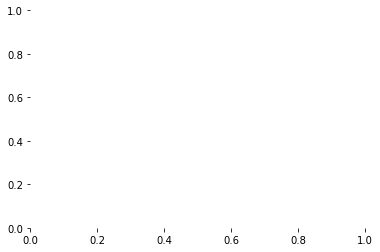

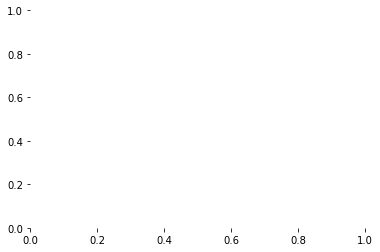

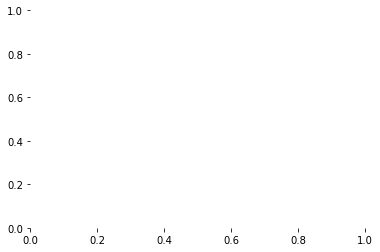

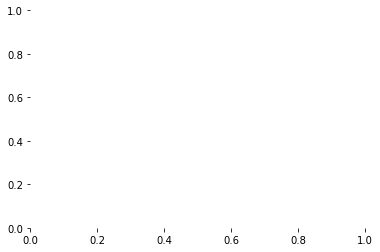

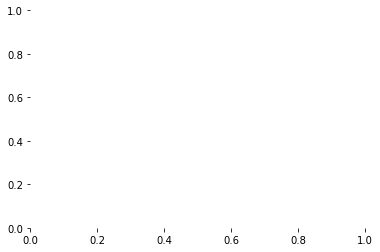

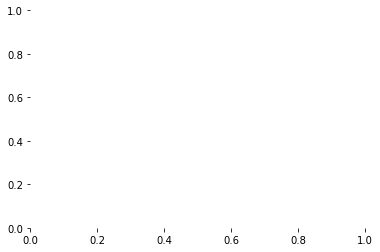

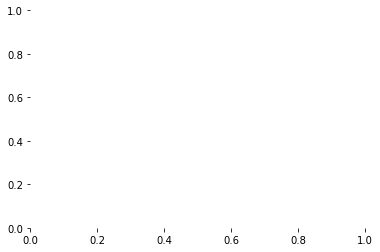

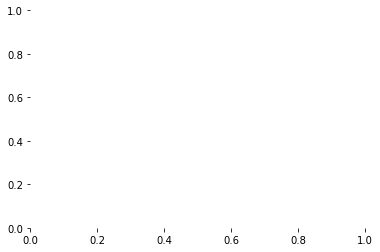

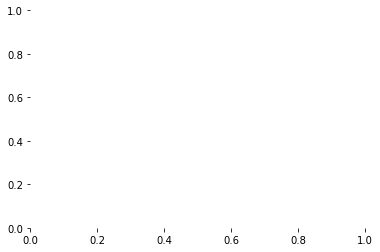

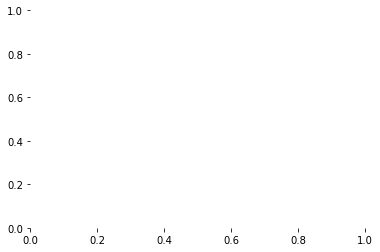

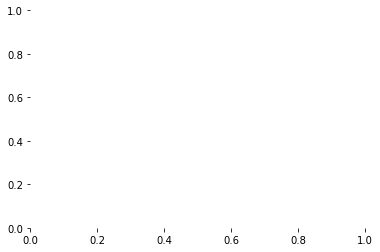

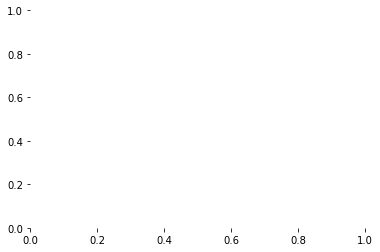

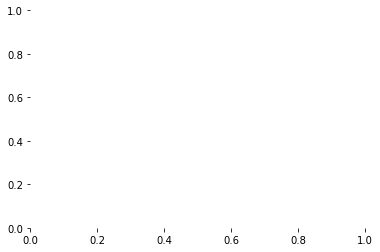

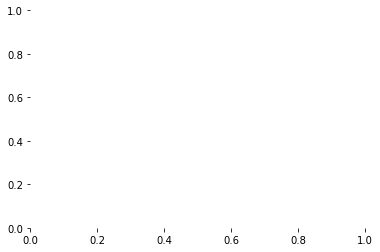

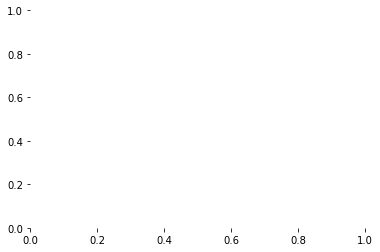

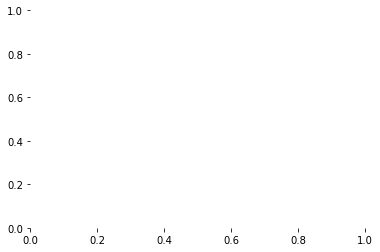

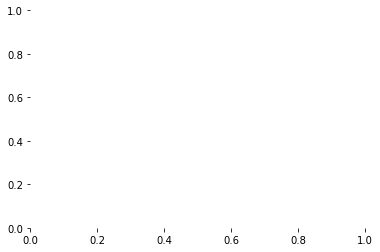

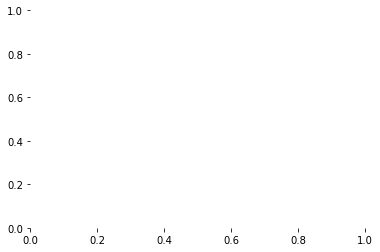

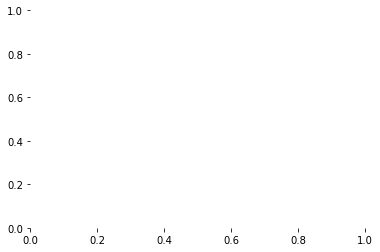

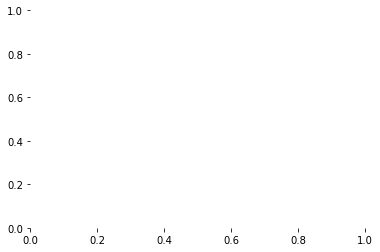

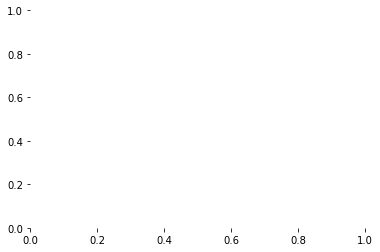

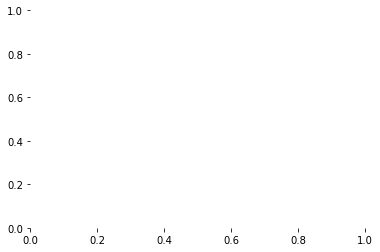

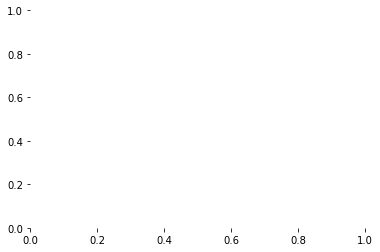

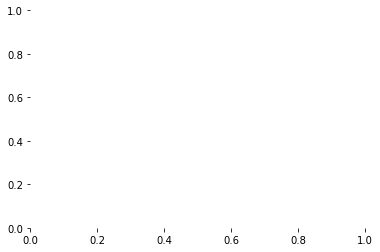

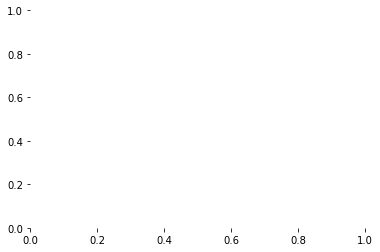

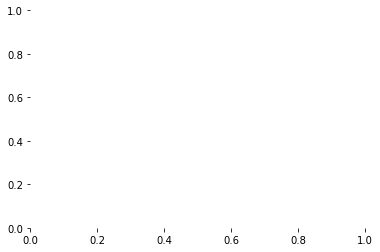

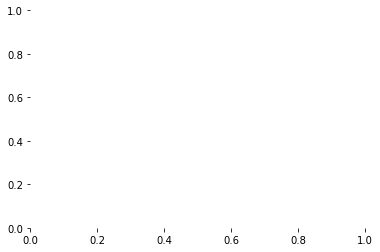

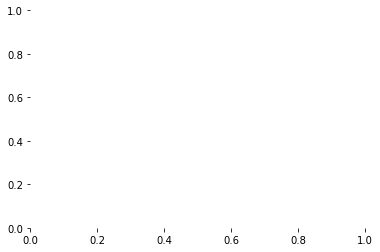

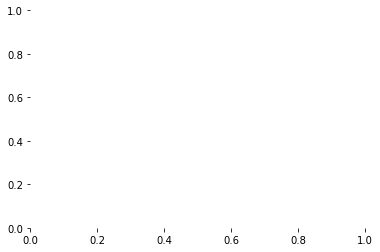

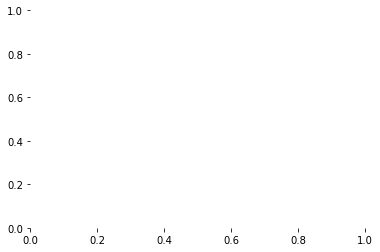

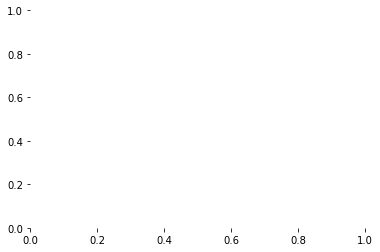

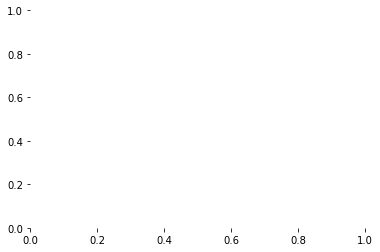

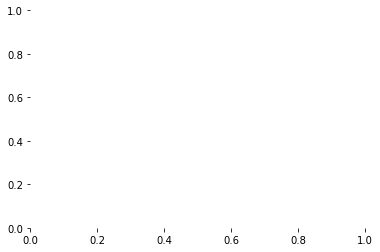

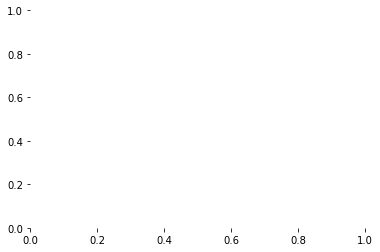

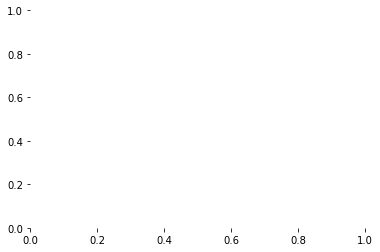

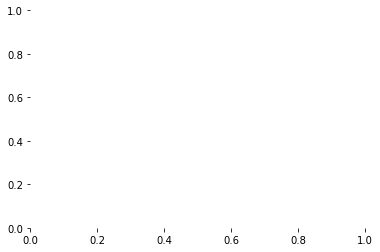

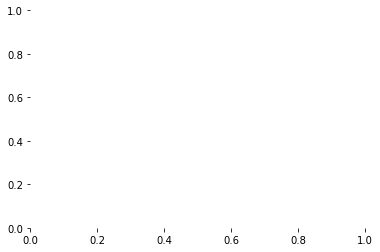

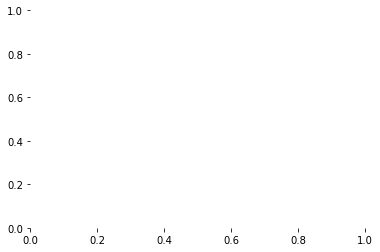

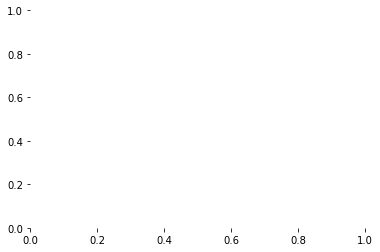

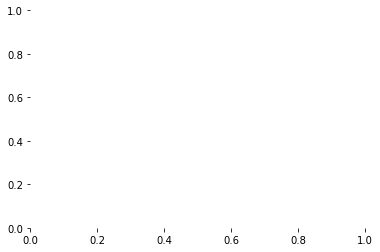

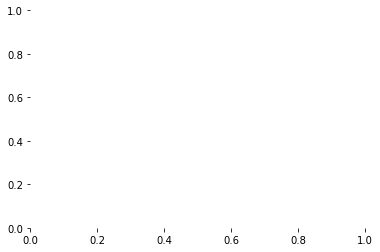

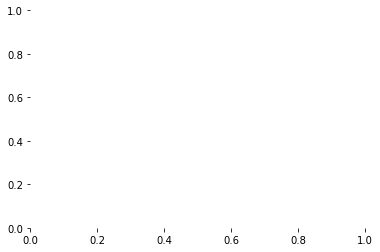

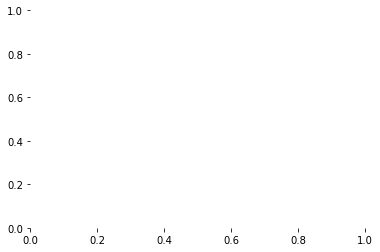

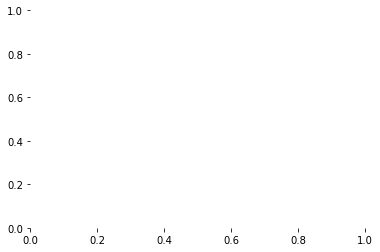

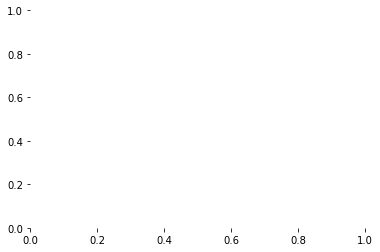

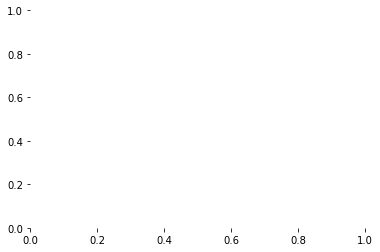

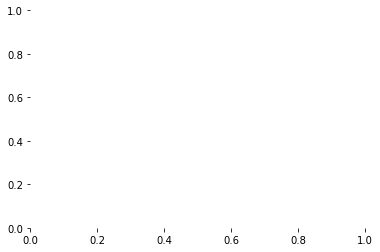

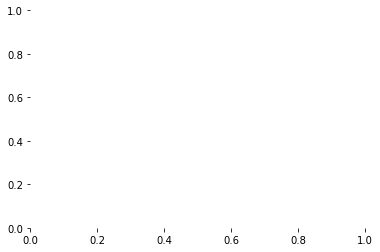

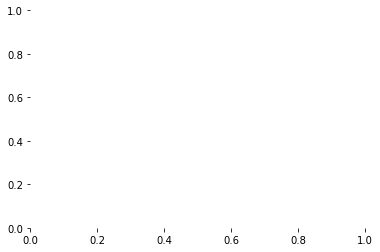

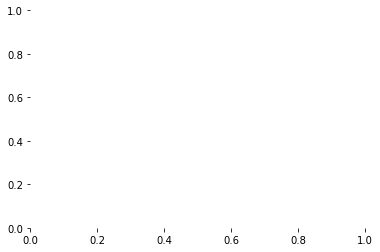

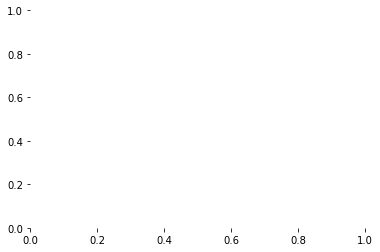

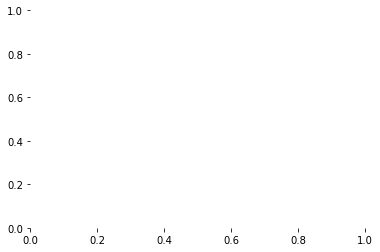

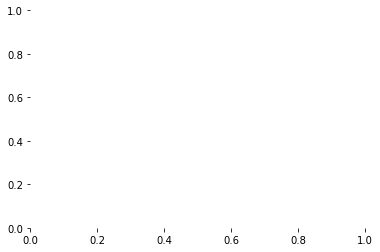

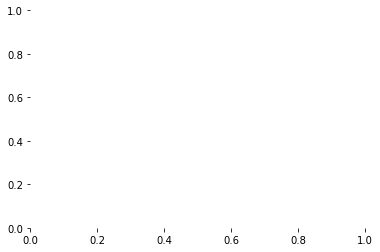

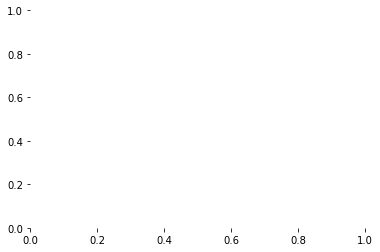

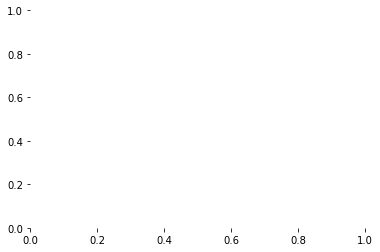

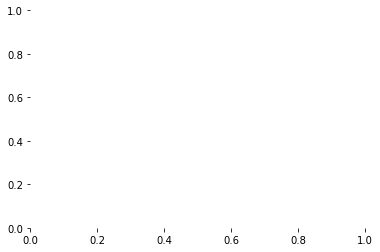

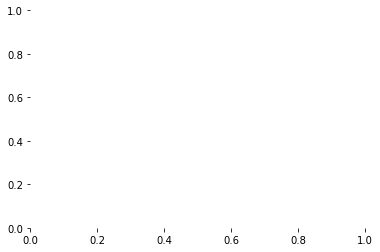

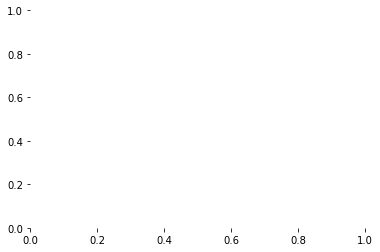

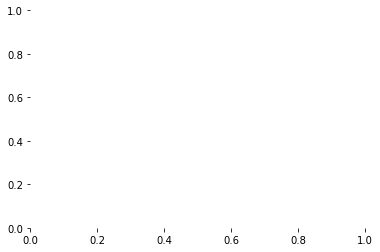

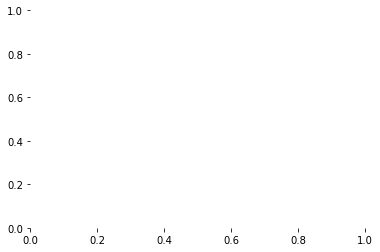

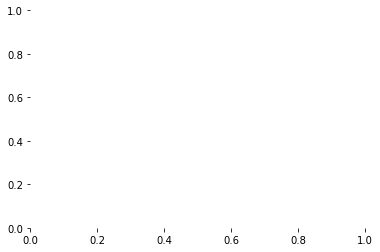

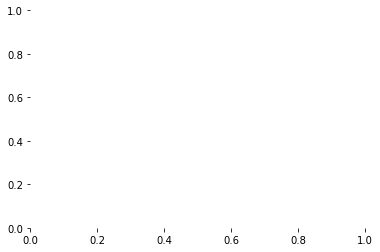

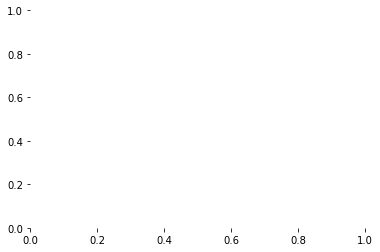

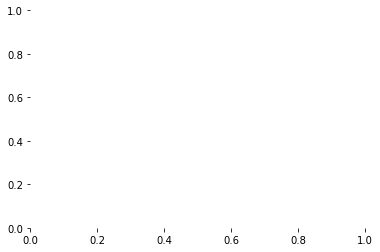

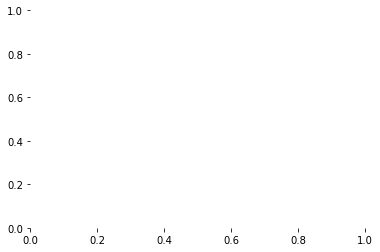

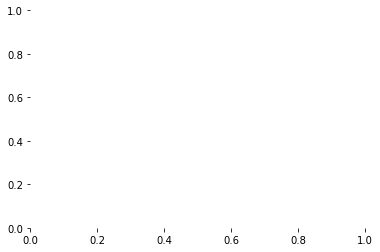

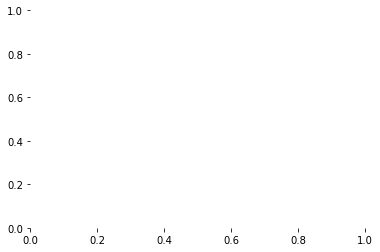

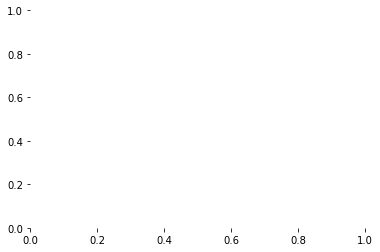

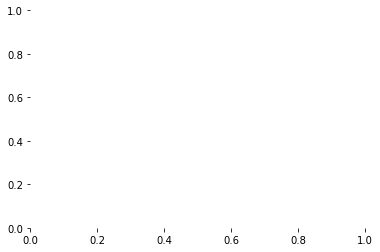

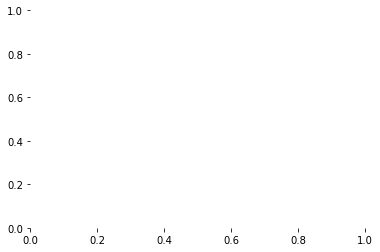

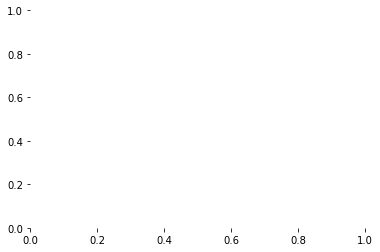

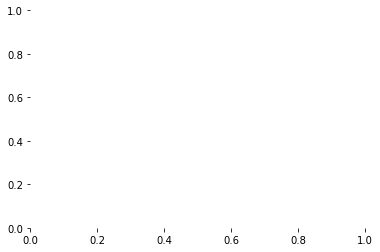

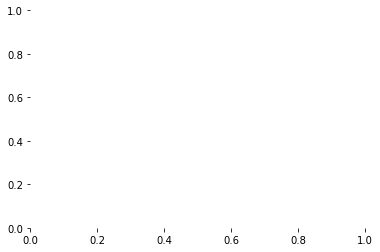

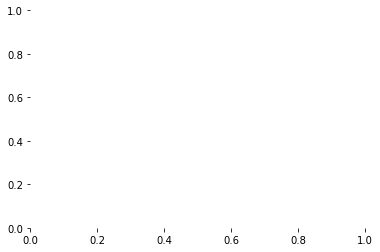

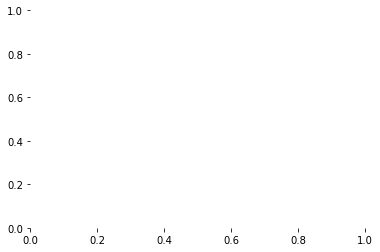

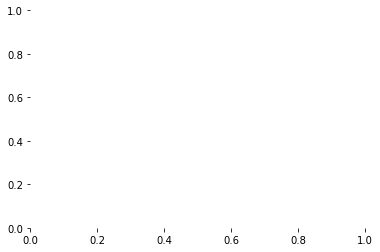

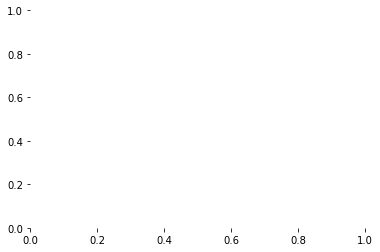

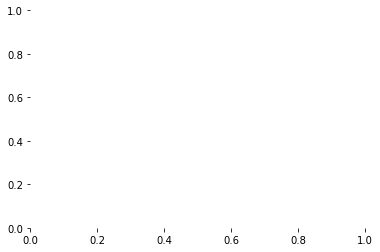

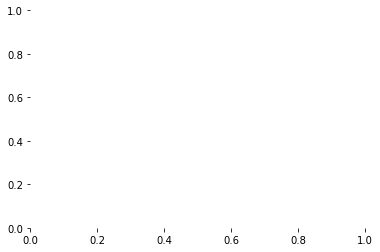

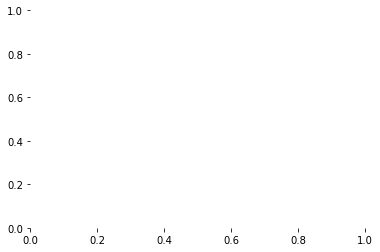

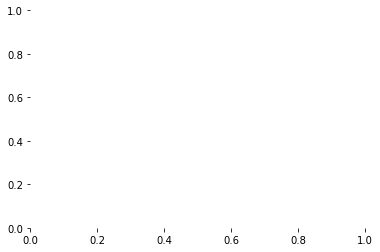

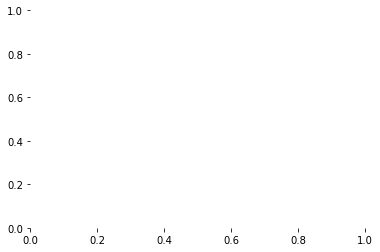

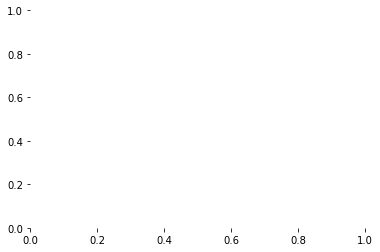

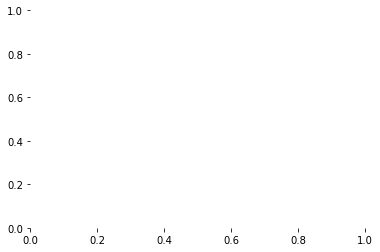

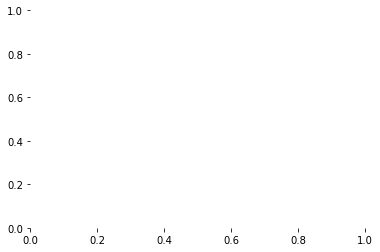

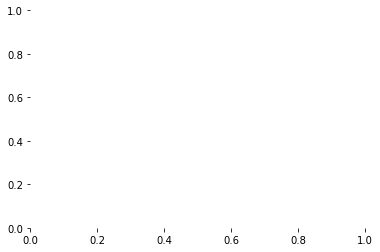

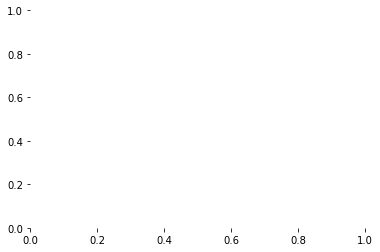

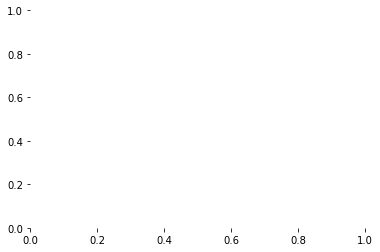

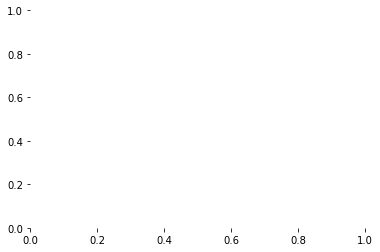

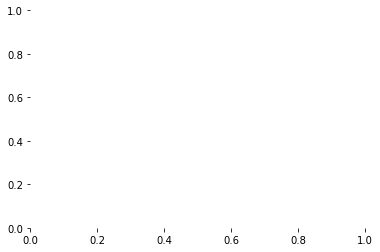

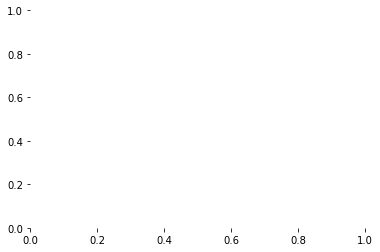

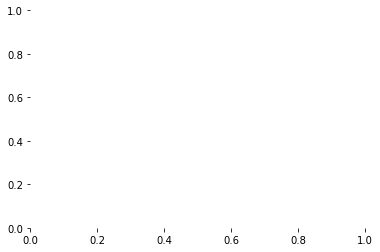

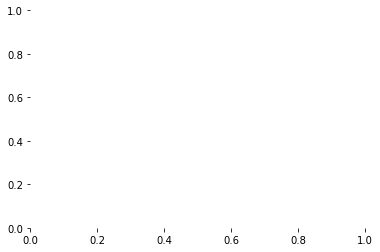

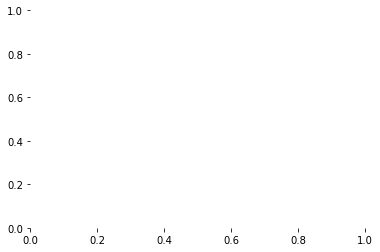

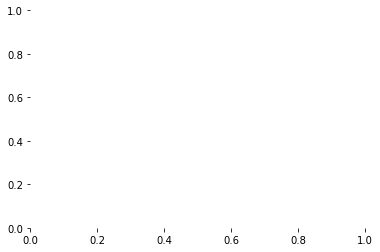

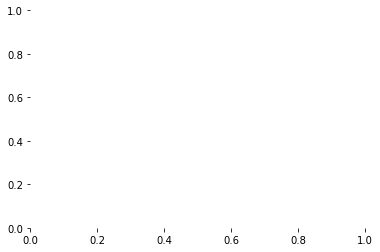

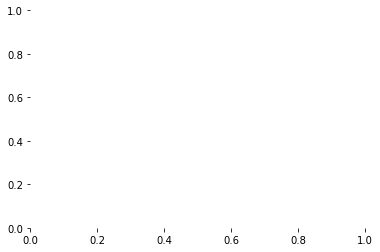

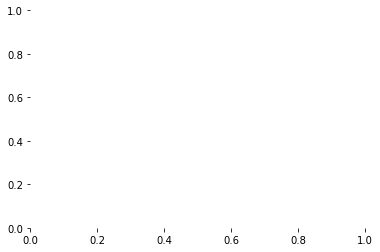

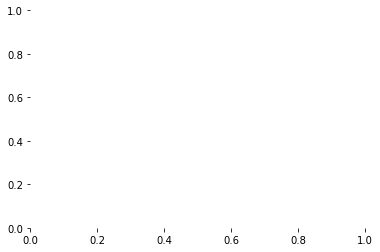

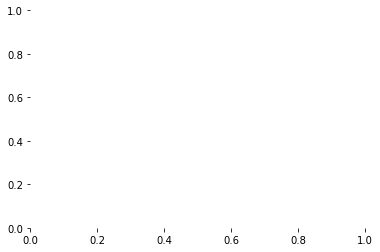

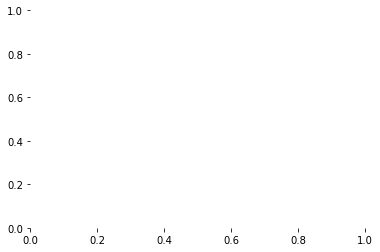

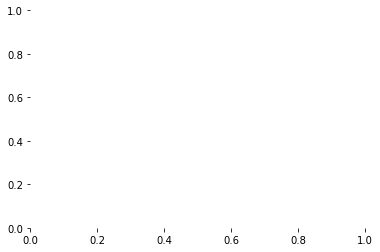

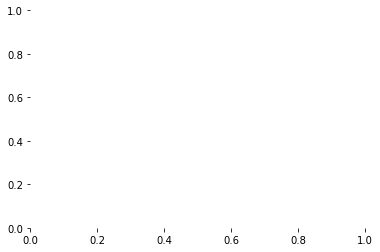

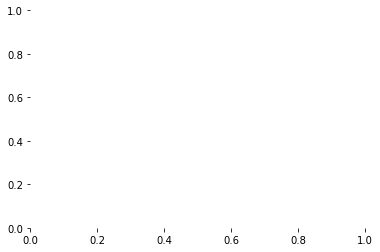

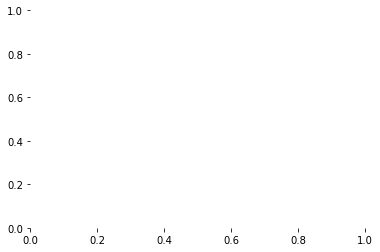

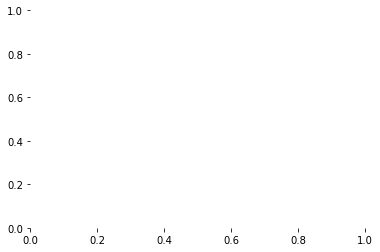

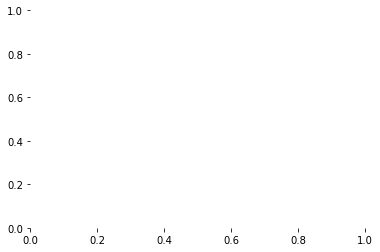

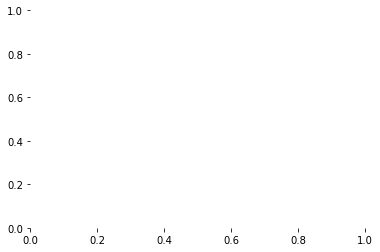

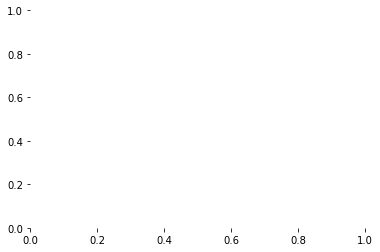

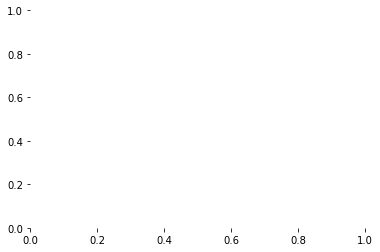

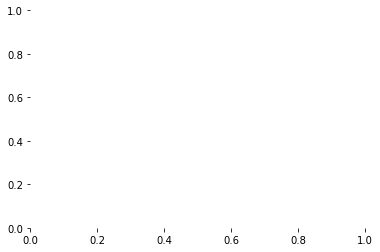

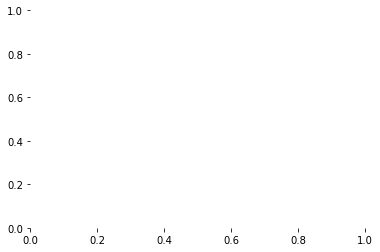

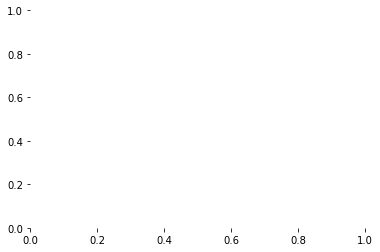

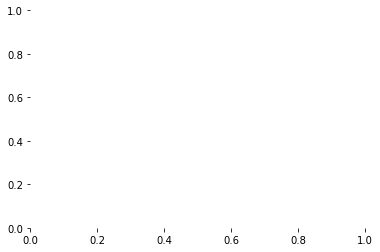

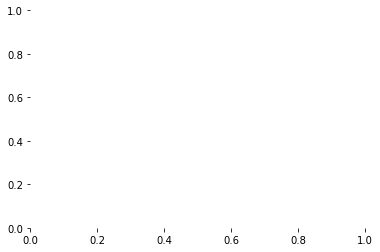

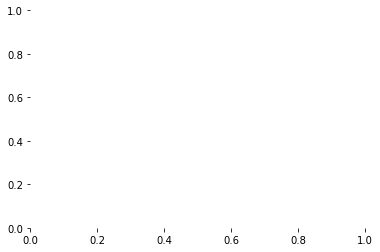

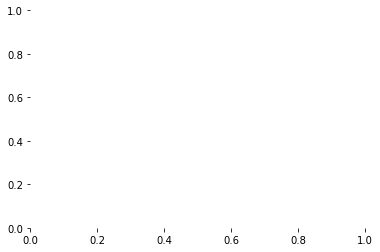

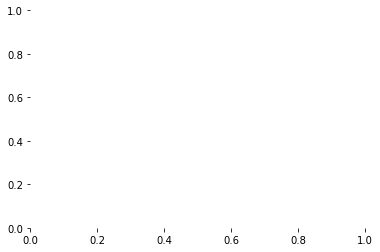

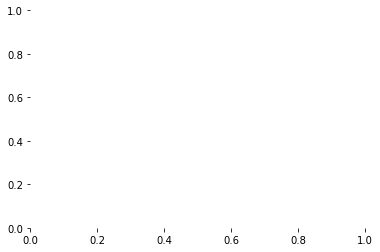

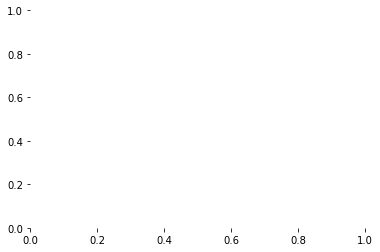

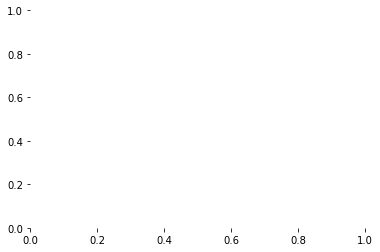

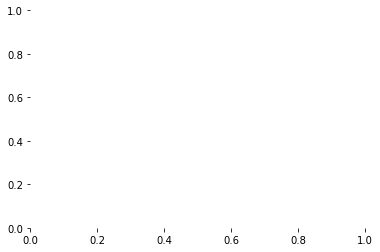

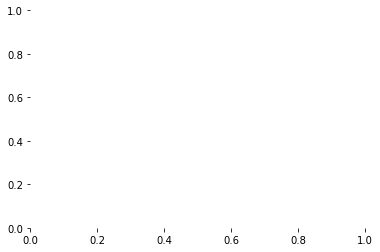

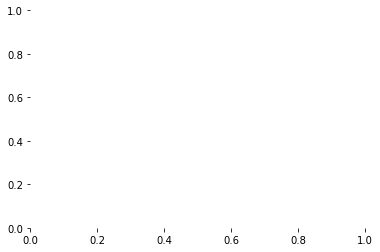

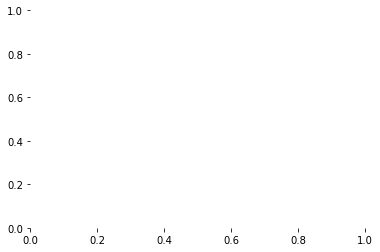

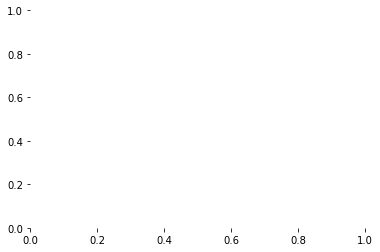

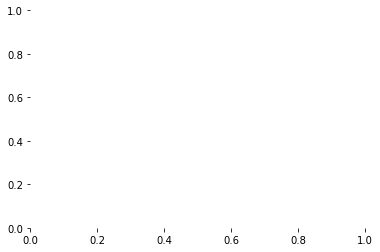

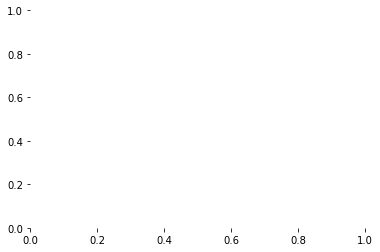

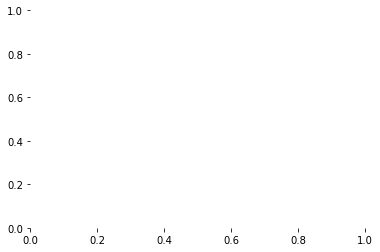

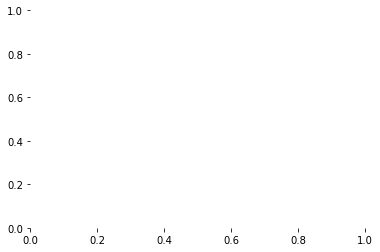

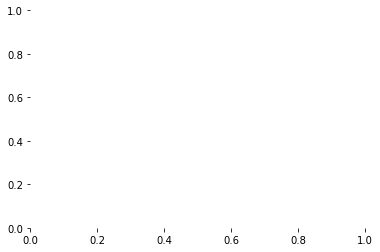

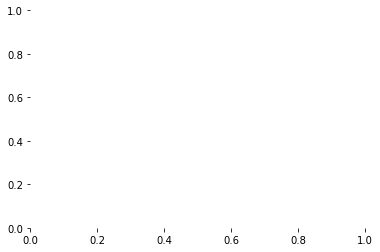

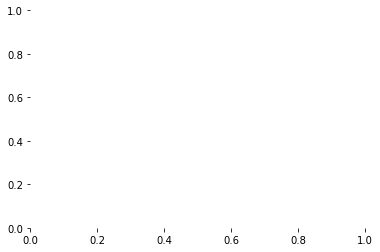

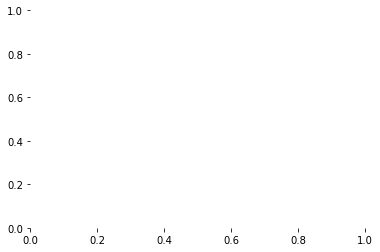

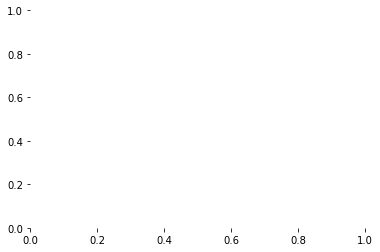

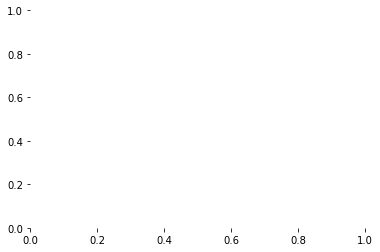

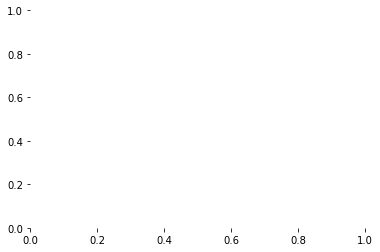

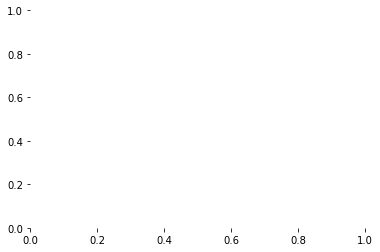

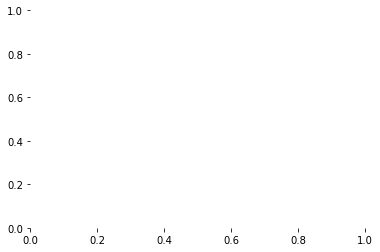

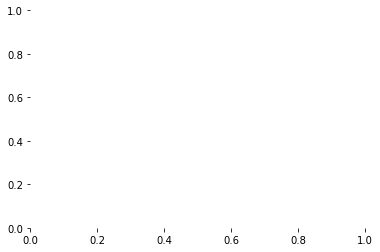

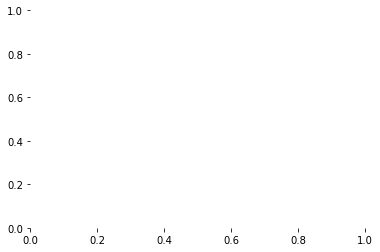

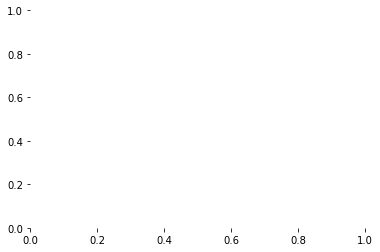

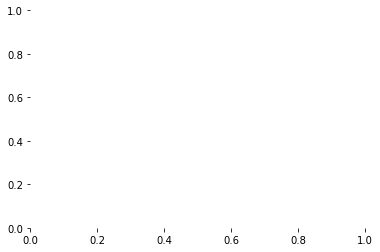

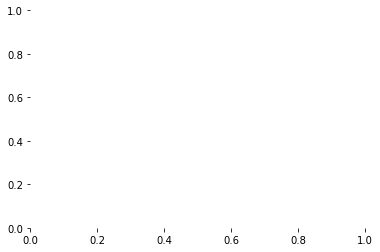

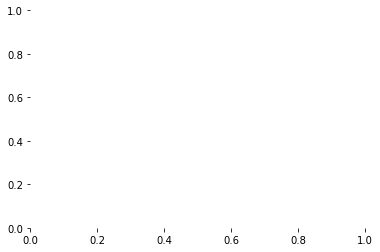

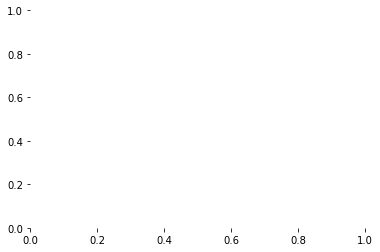

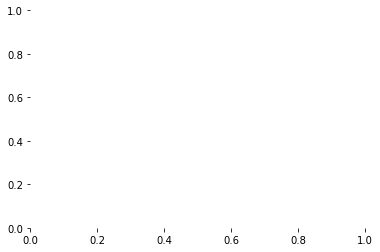

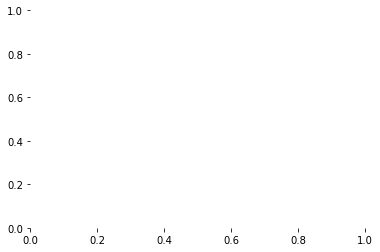

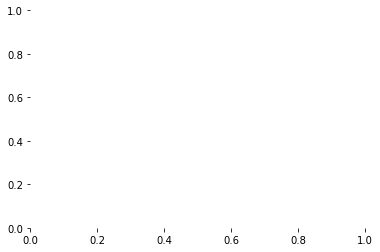

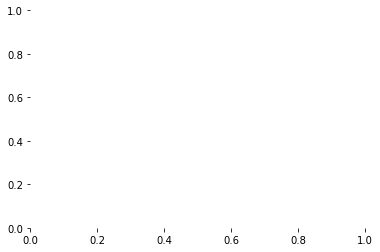

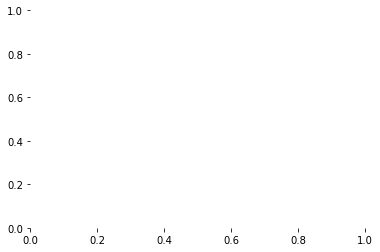

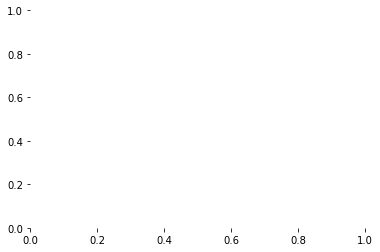

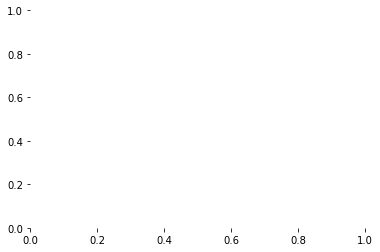

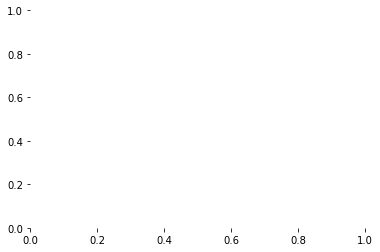

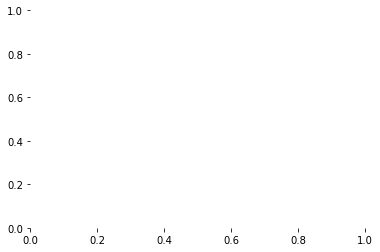

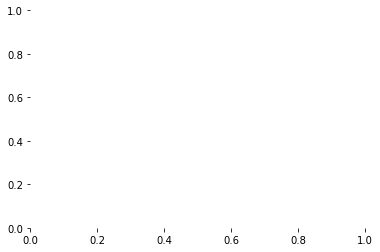

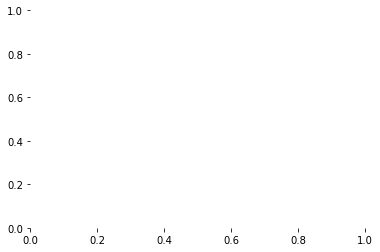

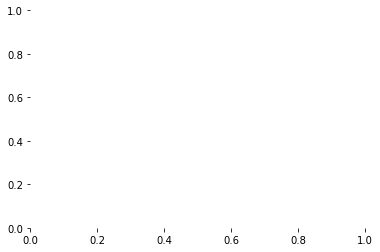

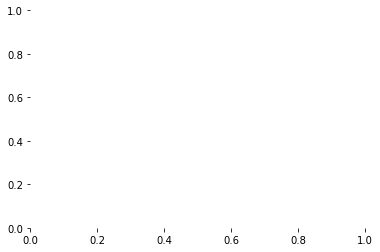

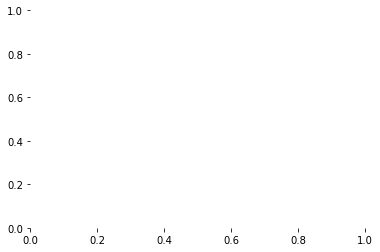

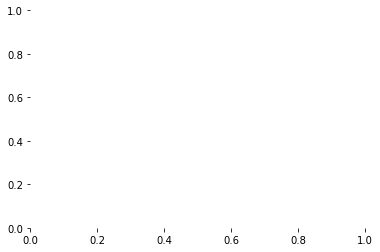

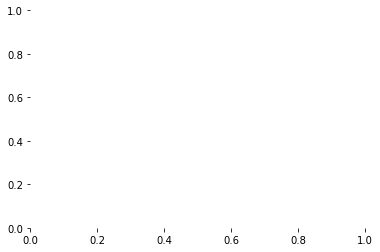

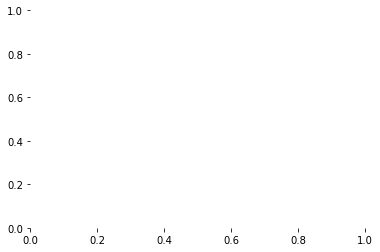

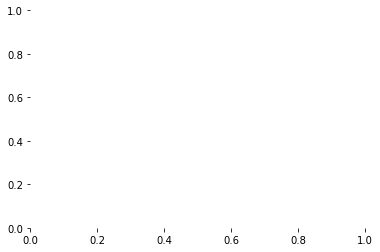

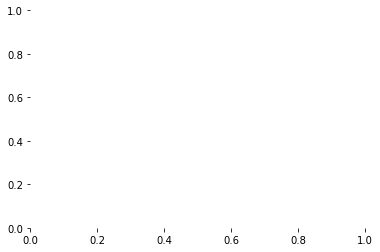

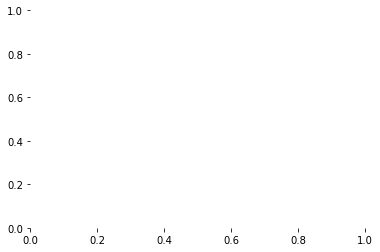

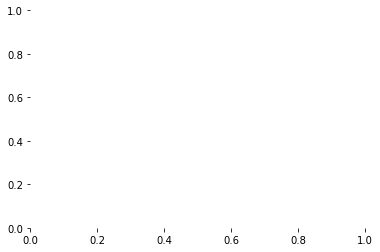

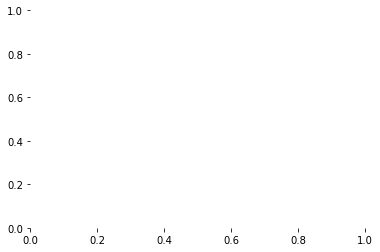

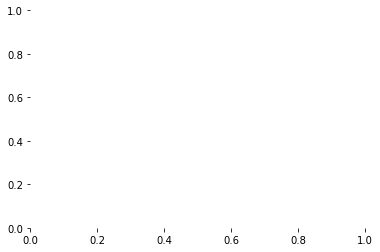

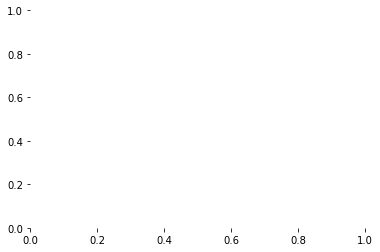

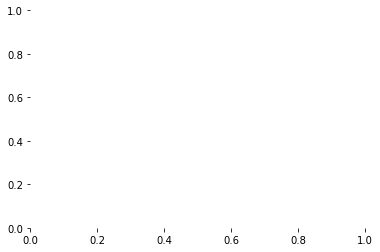

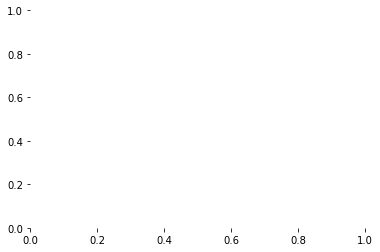

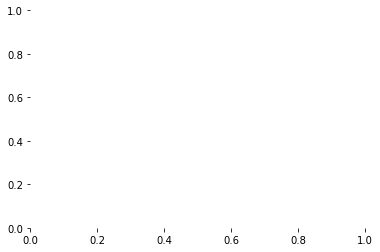

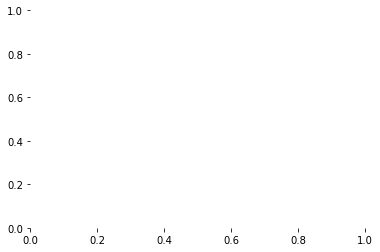

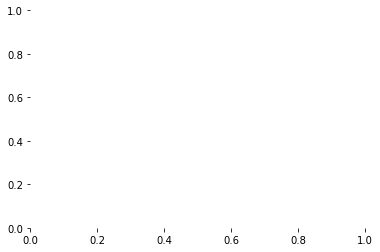

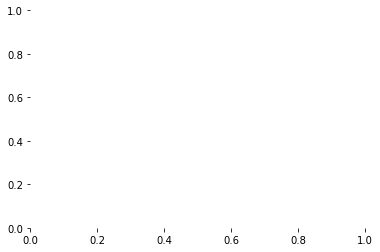

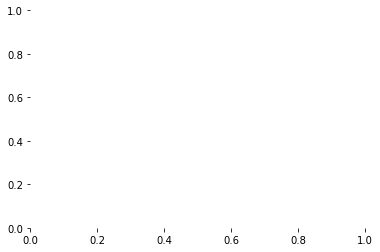

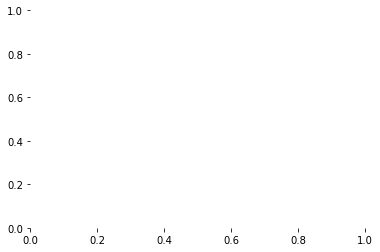

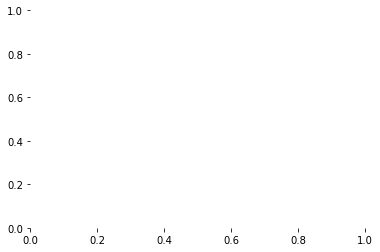

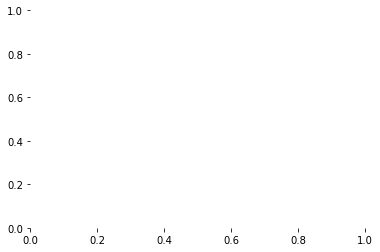

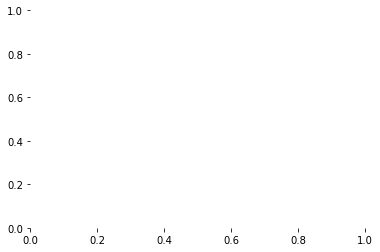

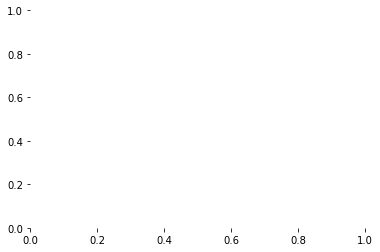

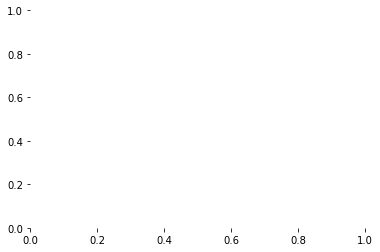

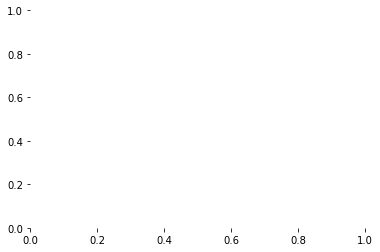

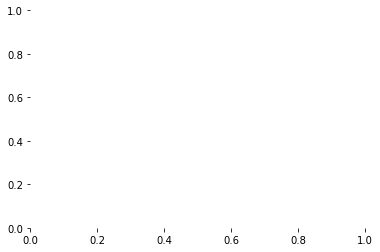

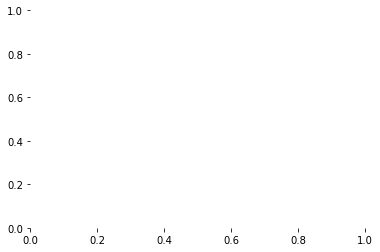

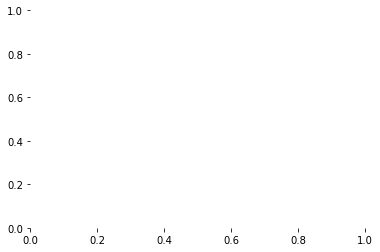

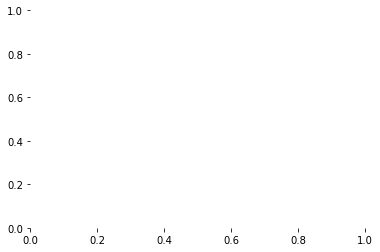

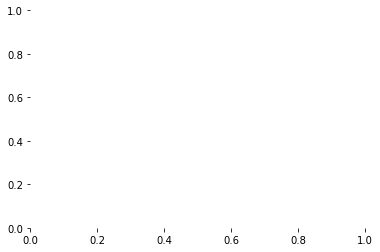

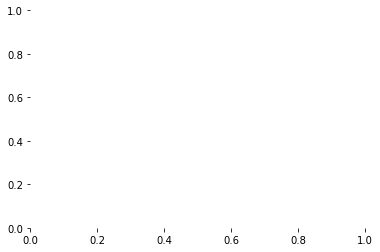

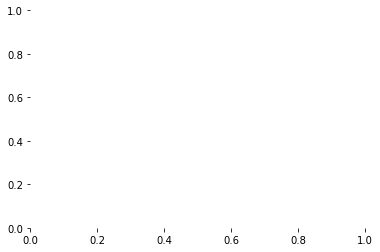

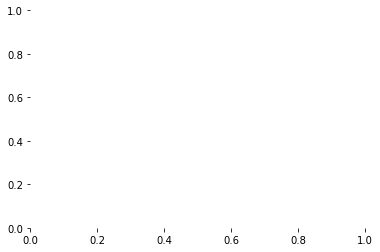

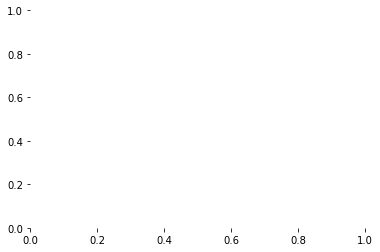

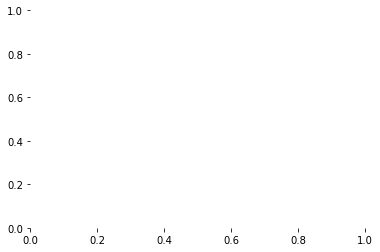

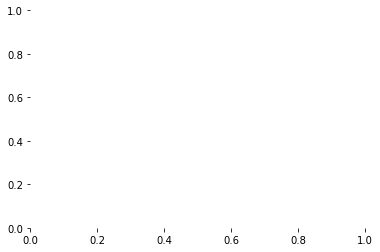

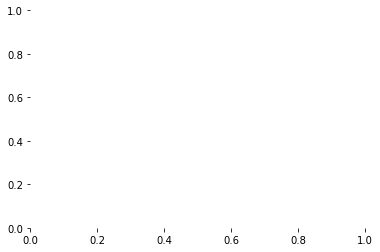

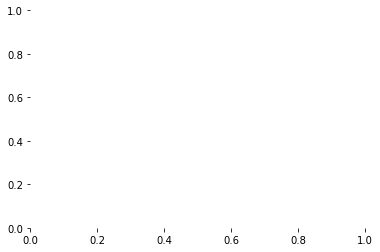

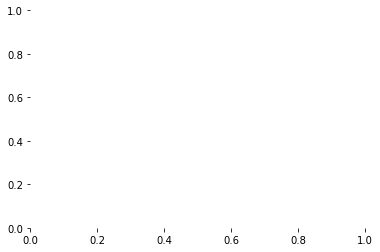

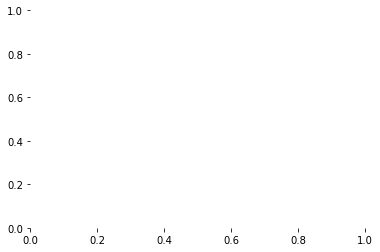

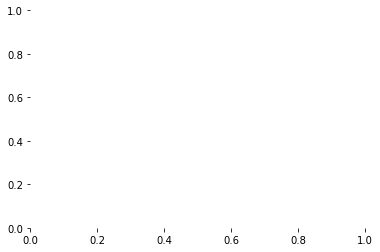

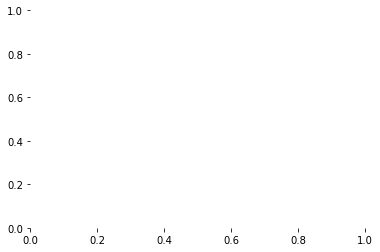

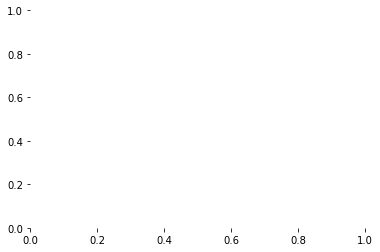

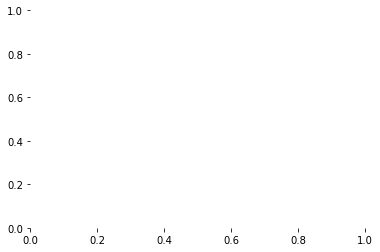

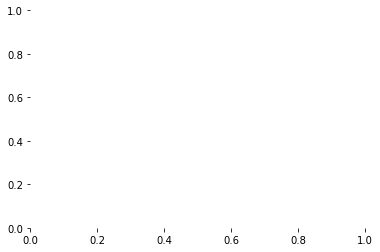

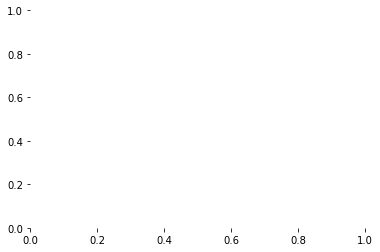

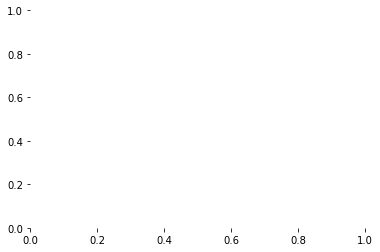

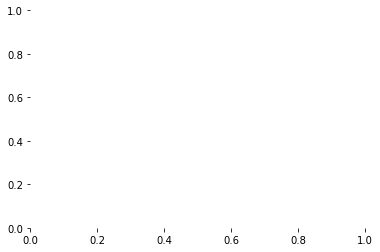

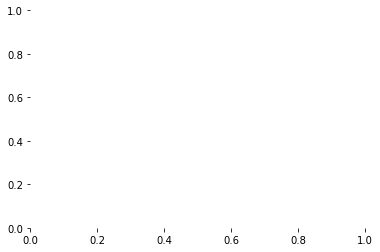

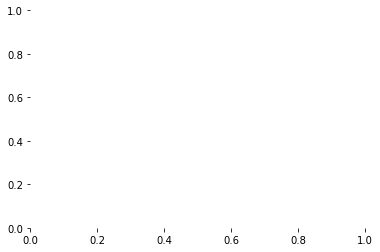

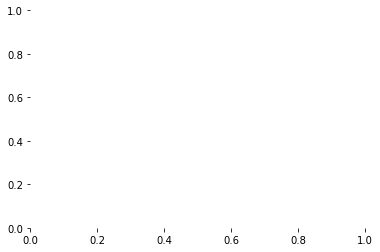

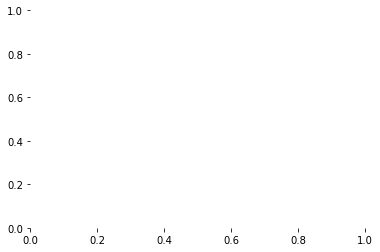

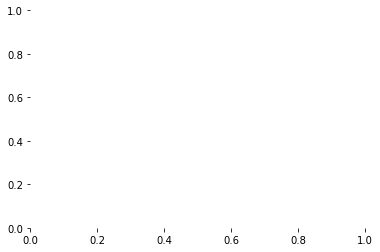

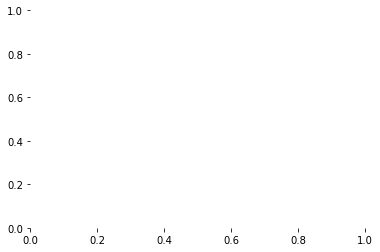

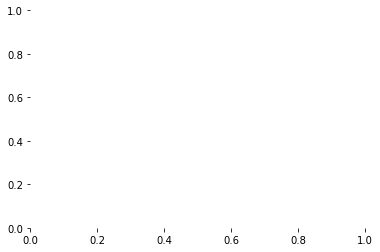

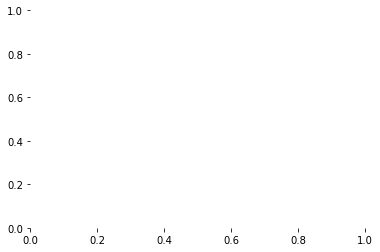

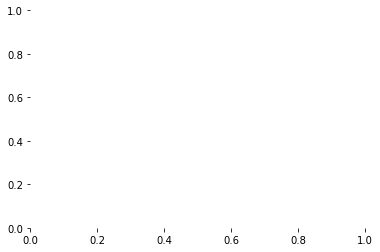

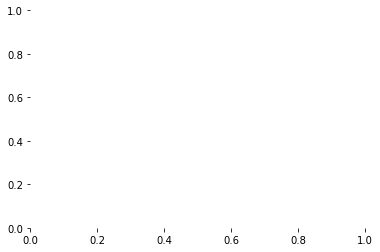

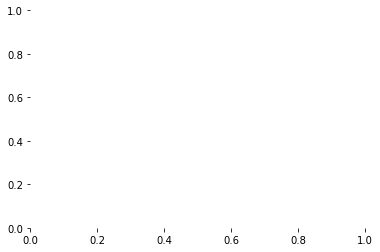

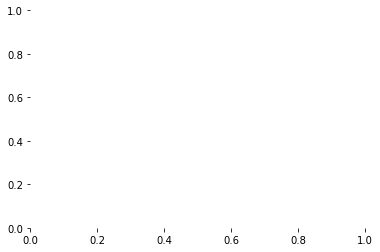

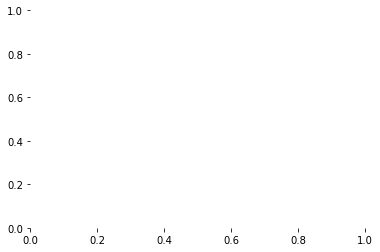

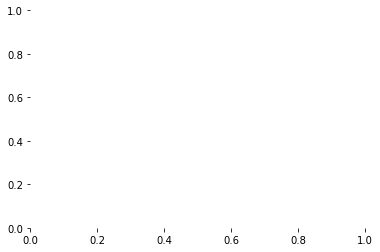

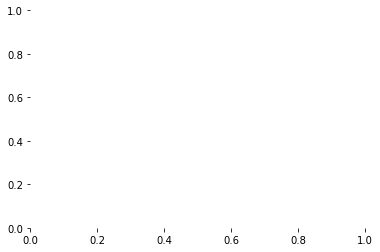

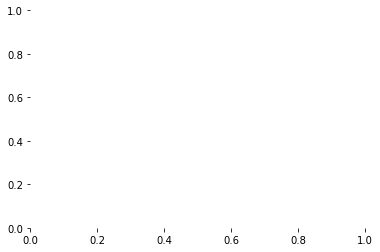

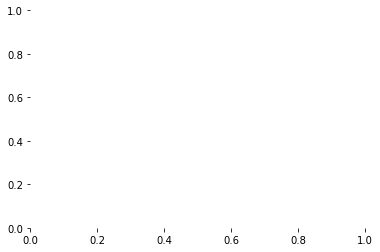

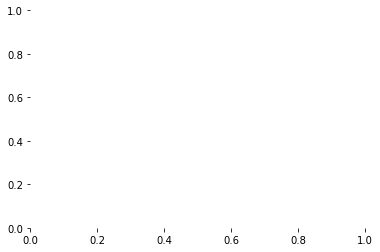

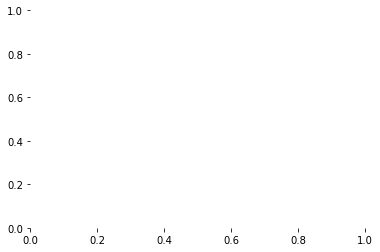

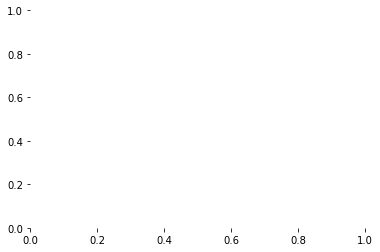

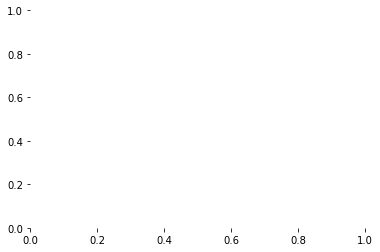

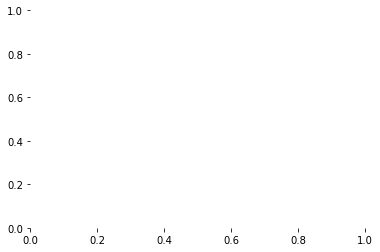

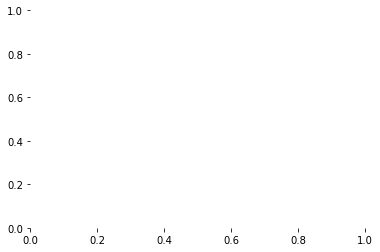

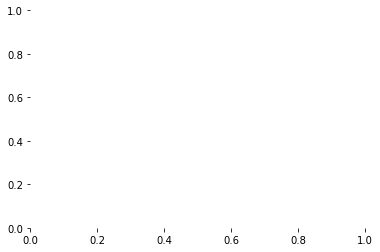

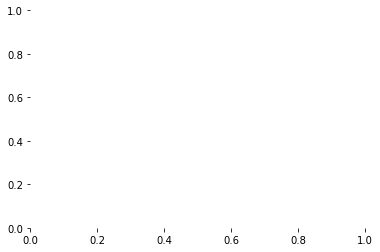

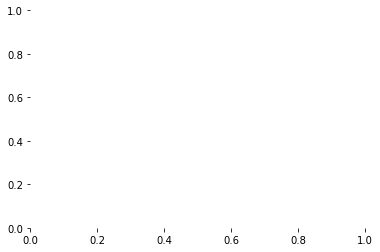

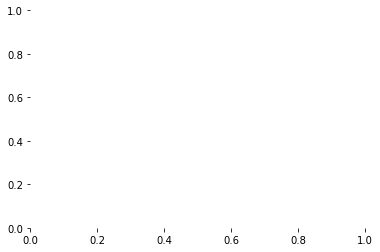

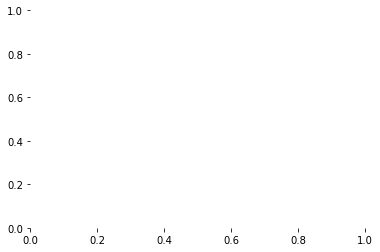

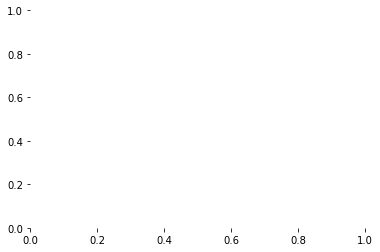

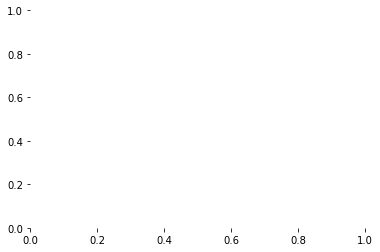

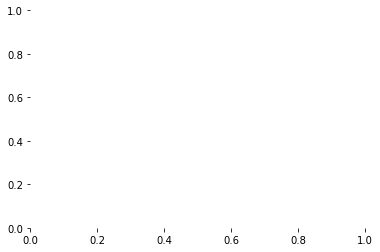

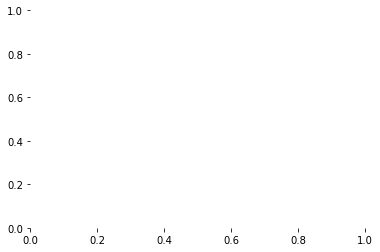

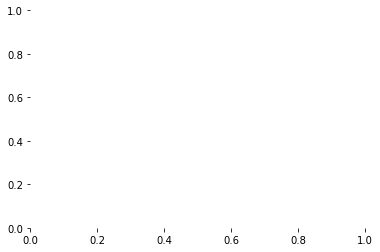

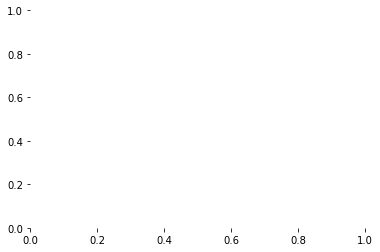

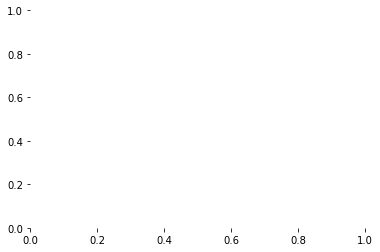

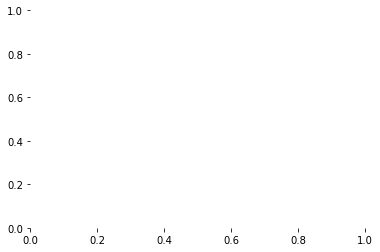

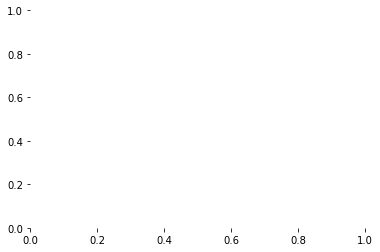

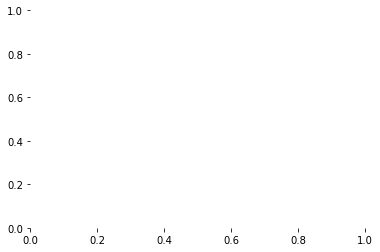

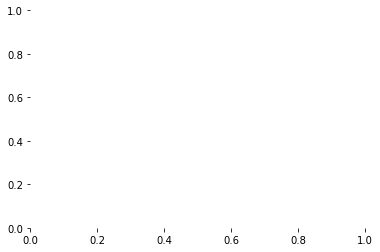

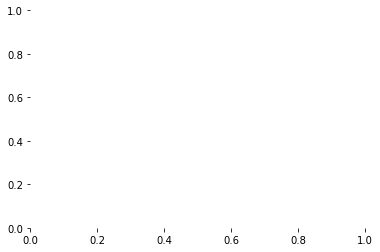

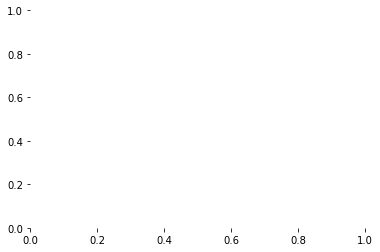

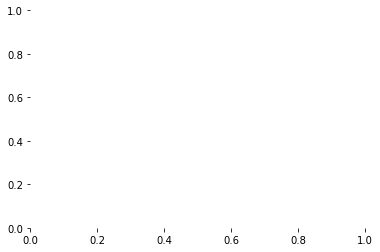

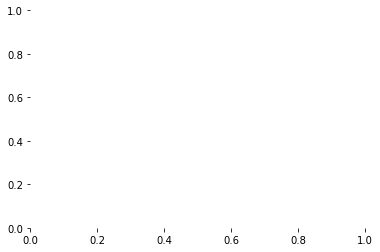

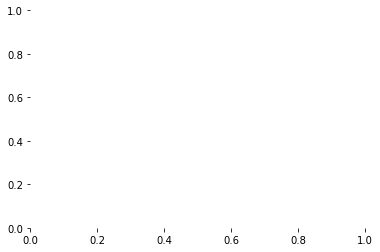

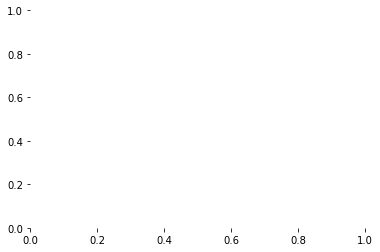

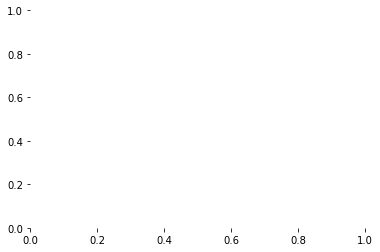

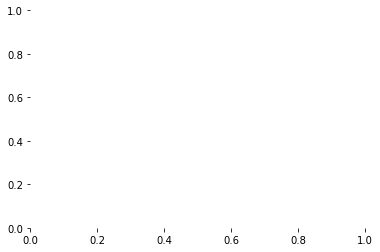

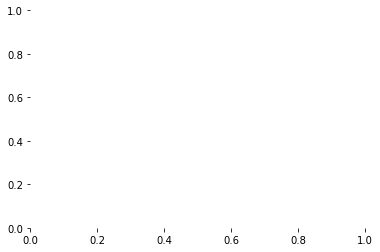

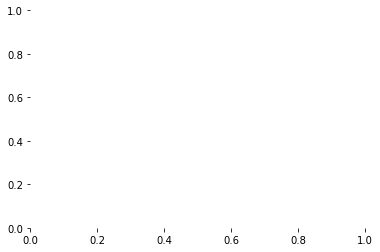

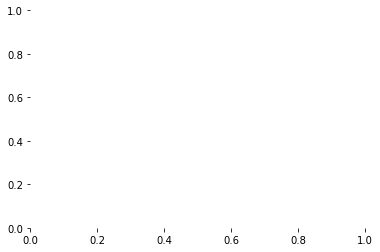

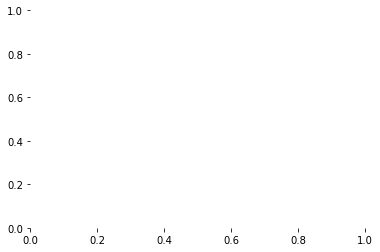

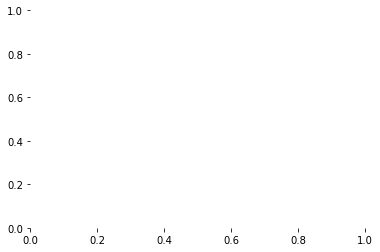

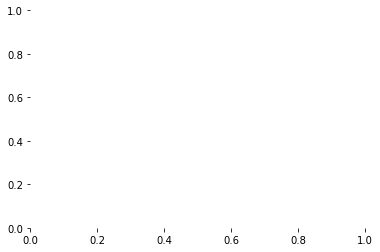

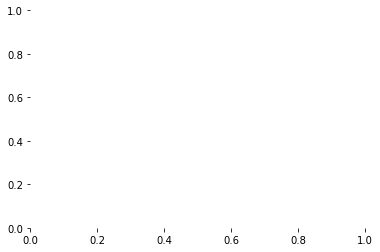

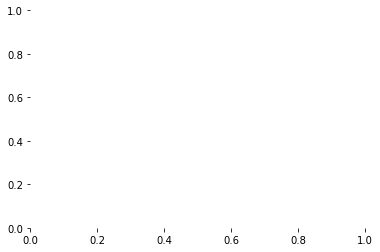

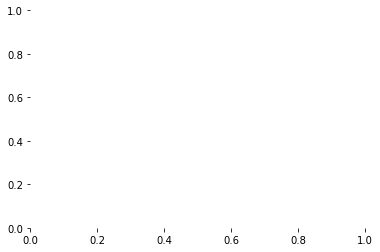

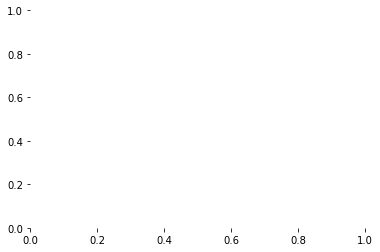

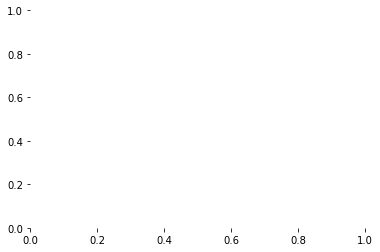

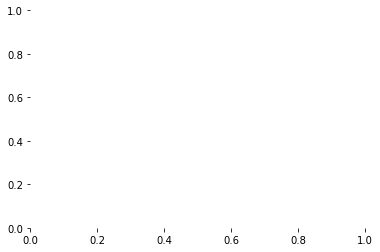

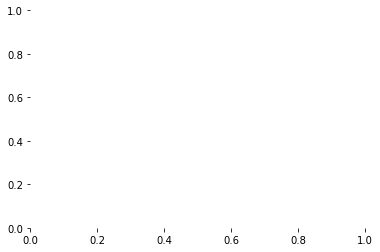

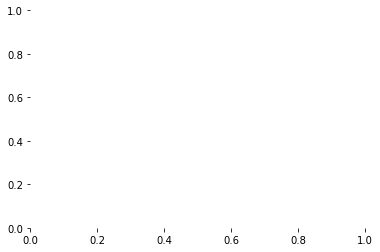

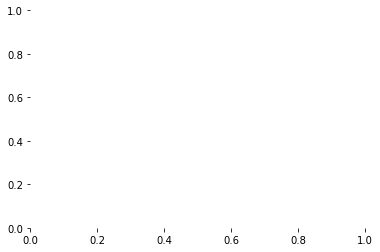

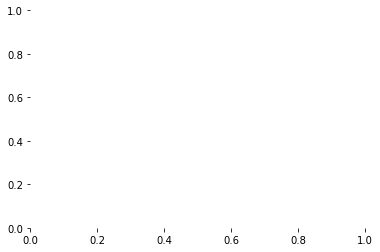

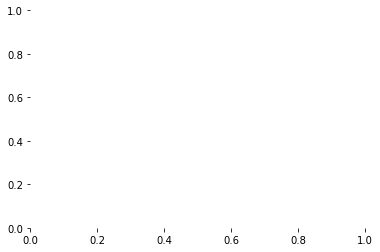

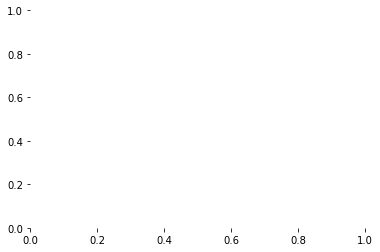

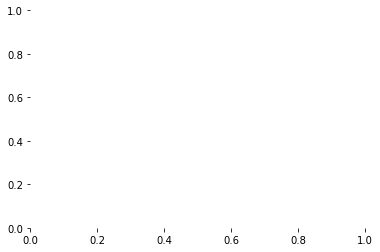

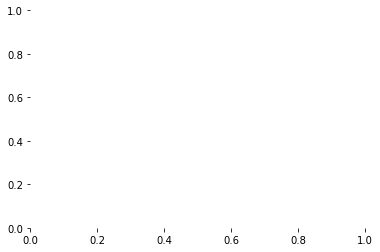

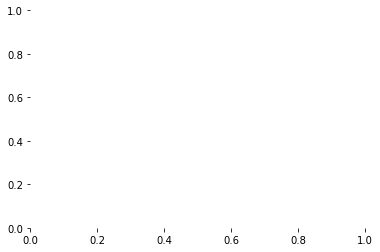

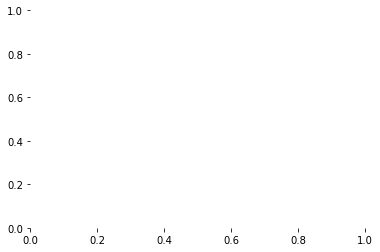

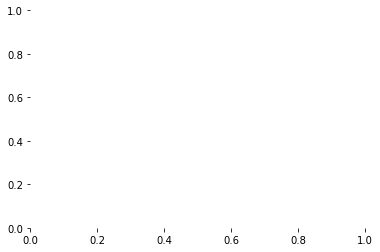

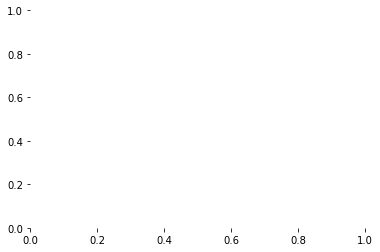

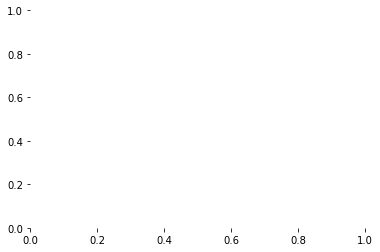

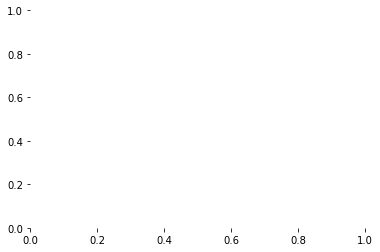

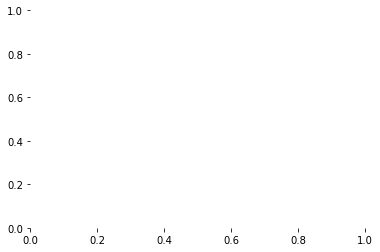

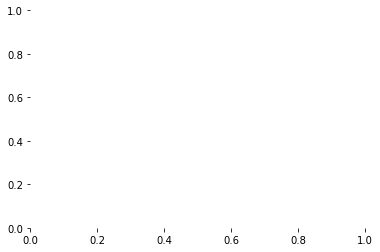

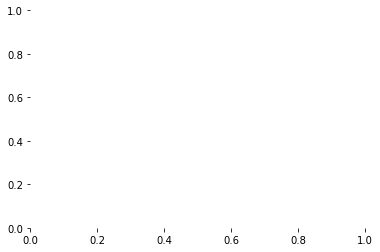

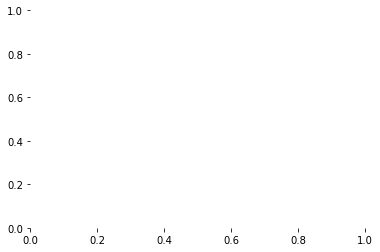

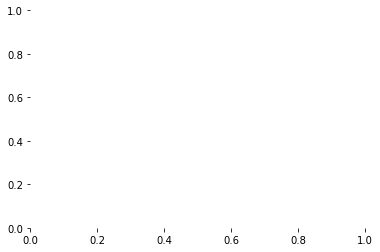

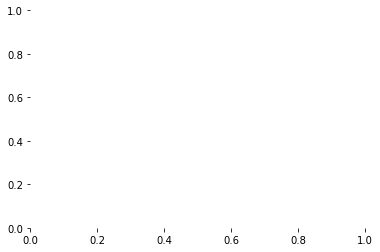

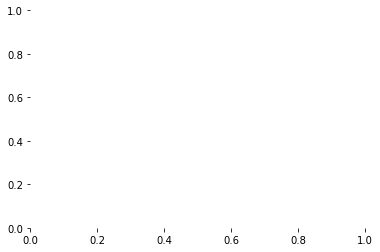

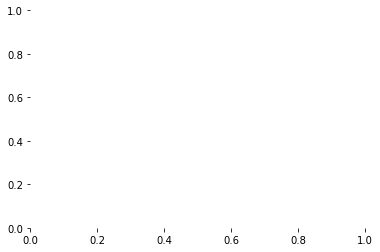

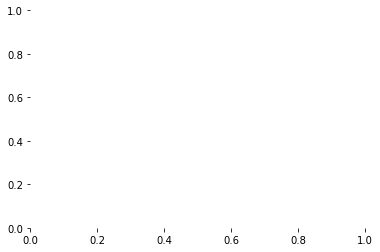

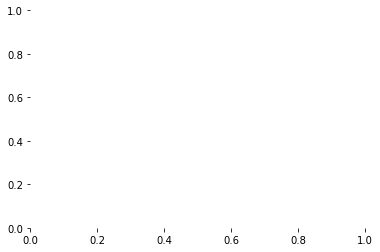

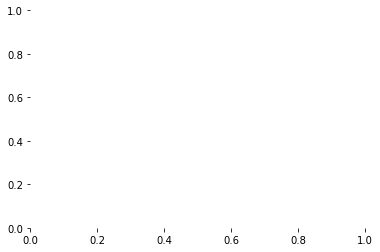

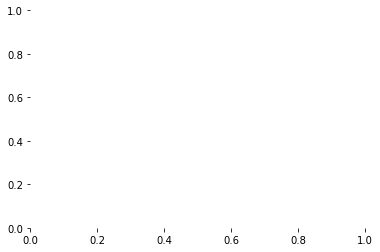

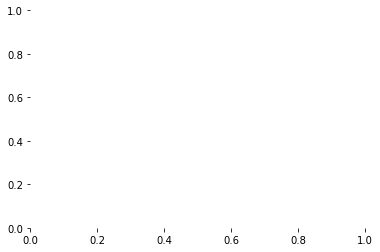

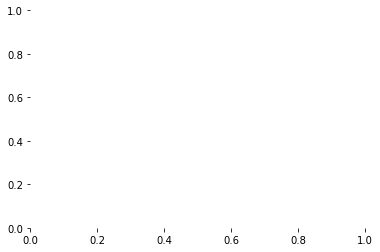

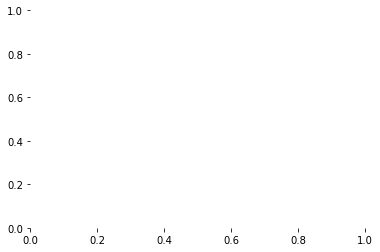

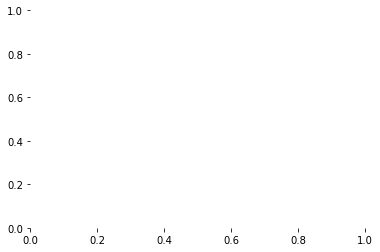

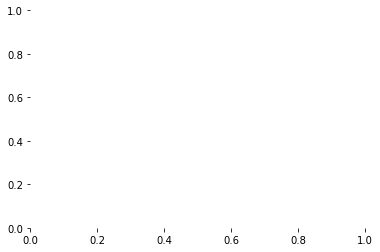

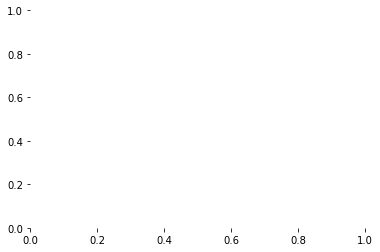

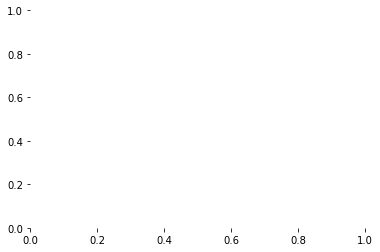

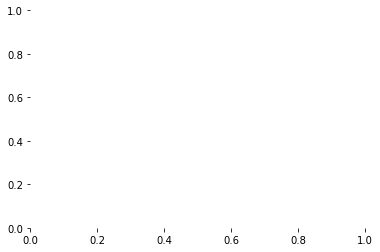

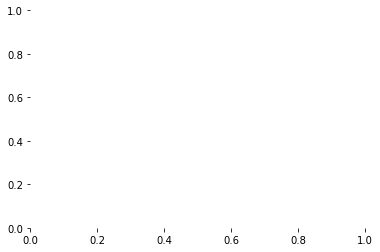

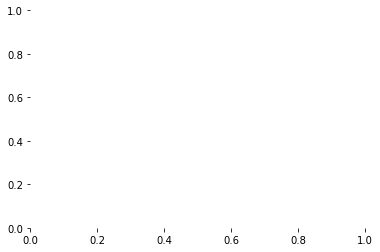

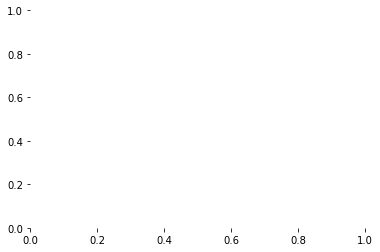

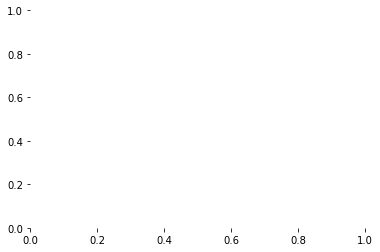

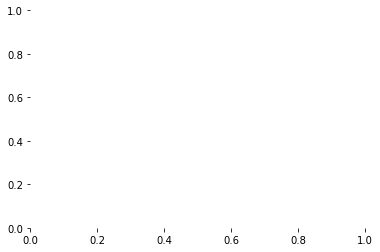

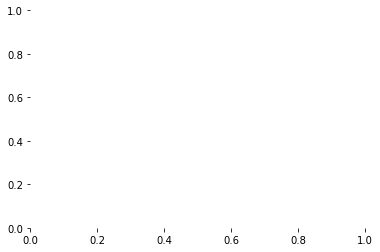

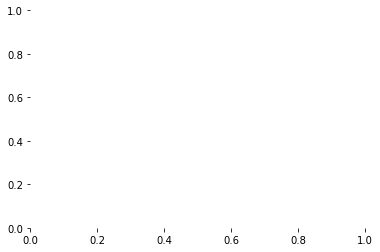

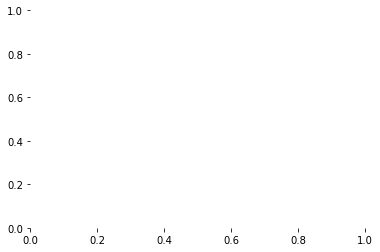

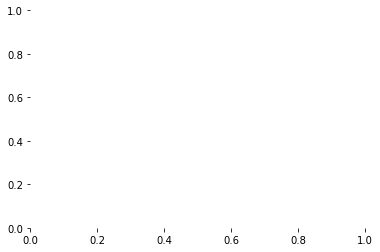

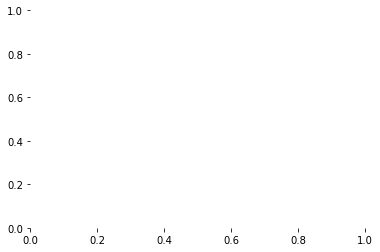

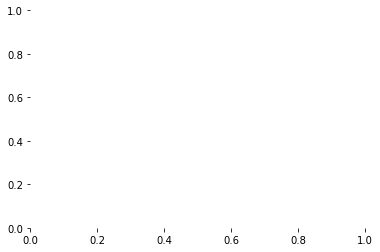

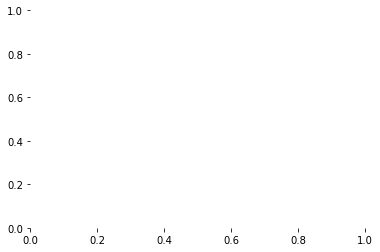

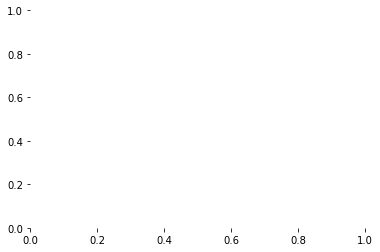

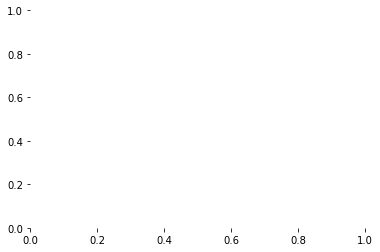

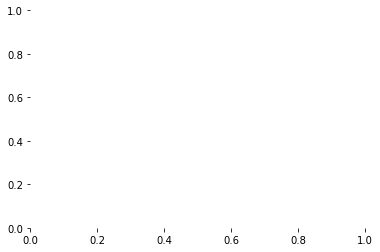

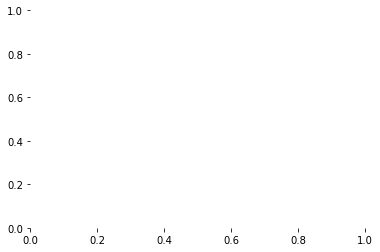

In [149]:
import matplotlib as mpl
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
plt.rcParams['animation.ffmpeg_path'] = '/Applications/usr/local/bin/ffmpeg' # Add the path of ffmpeg here!!
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Mahesh'), bitrate=1800)
#mpl.rcParams['animation.embed_limit'] = 2**128
animator = animation.FuncAnimation(fig,barchart,frames=len(data),interval=30,repeat=False)
#HTML(animator.to_jshtml())
save_animation = animator.save('/Users/maheshworpaudel/Desktop/FPL/FPL2021_trial.mp4', dpi=150, writer=writer)
#HTML(animator.to_html5_video())